# Assignment 1


### This is the supporting Notbook for the given assignment. You will be provided with the instructions and code skeleton of the questions.

1. Please implement the codes on your own cosidering plagarism policy.
2. Write code for corresponding questions in their designated places.
3. Each group have to submit only one notebook (.ipynb) or python (.py) file.

## Question: 1

### A). Write a Python function to generate the specified graph of 50 nodes and plot the graph. (without using any external library) [3 Marks]

In [ ]:
# perform imports

import random

# write a function to generate the graph

def generate_erdos_renyi_graph(n, p, seed=None):

  """
    Generate an Erdős-Rényi random graph without using external libraries.

    Args:
    n (int): Number of nodes
    p (float): Probability of edge creation between any two nodes [take p value as 0.1]

    Returns:

    # todo

    """
    # implement the function
  graph=[]
  for u in range(n):
      for v in range(u + 1, n):
          if random.choices([0,1],weights=[1-p,p],k=1)[0]==1:
              graph.append((u,v))

    # todo
  return graph

In [ ]:
# write a function to plot the graph
def visualize_graph(graph): # todo
    """
    Visualize the graph using matplotlib.

    Args:
    # todo
    """

    # define your graph here
    G = nx.Graph(graph)  #todo


    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_color='lightblue',
            with_labels=True, node_size=500, font_size=10, font_weight='bold')
    plt.title("Erdős-Rényi Random Graph")
    plt.show()

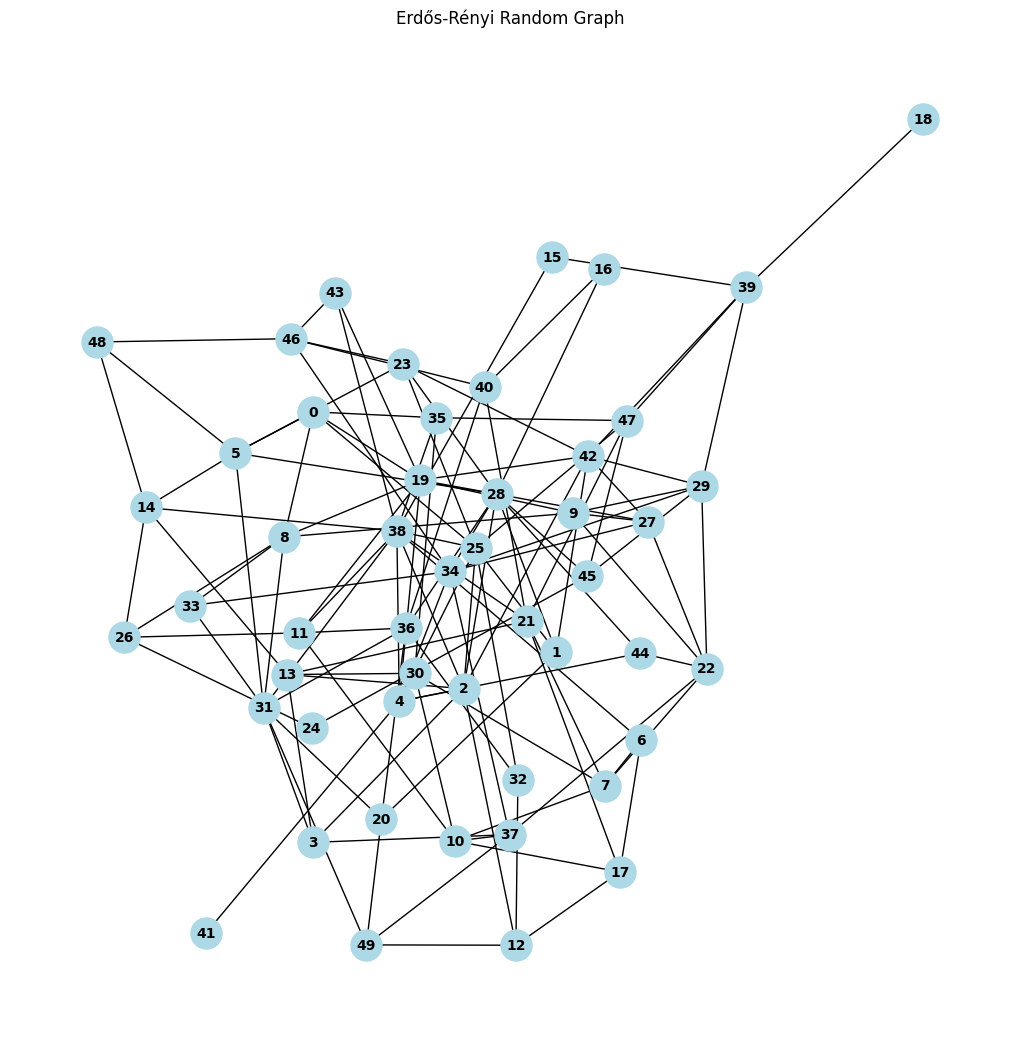

In [ ]:
# Generating graph
n = 50
p = 0.1
import matplotlib.pyplot as plt
visualize_graph(generate_erdos_renyi_graph(n,p))
# todo

### You may also use NetworkX lbrary to generate this graph. (non-graded)

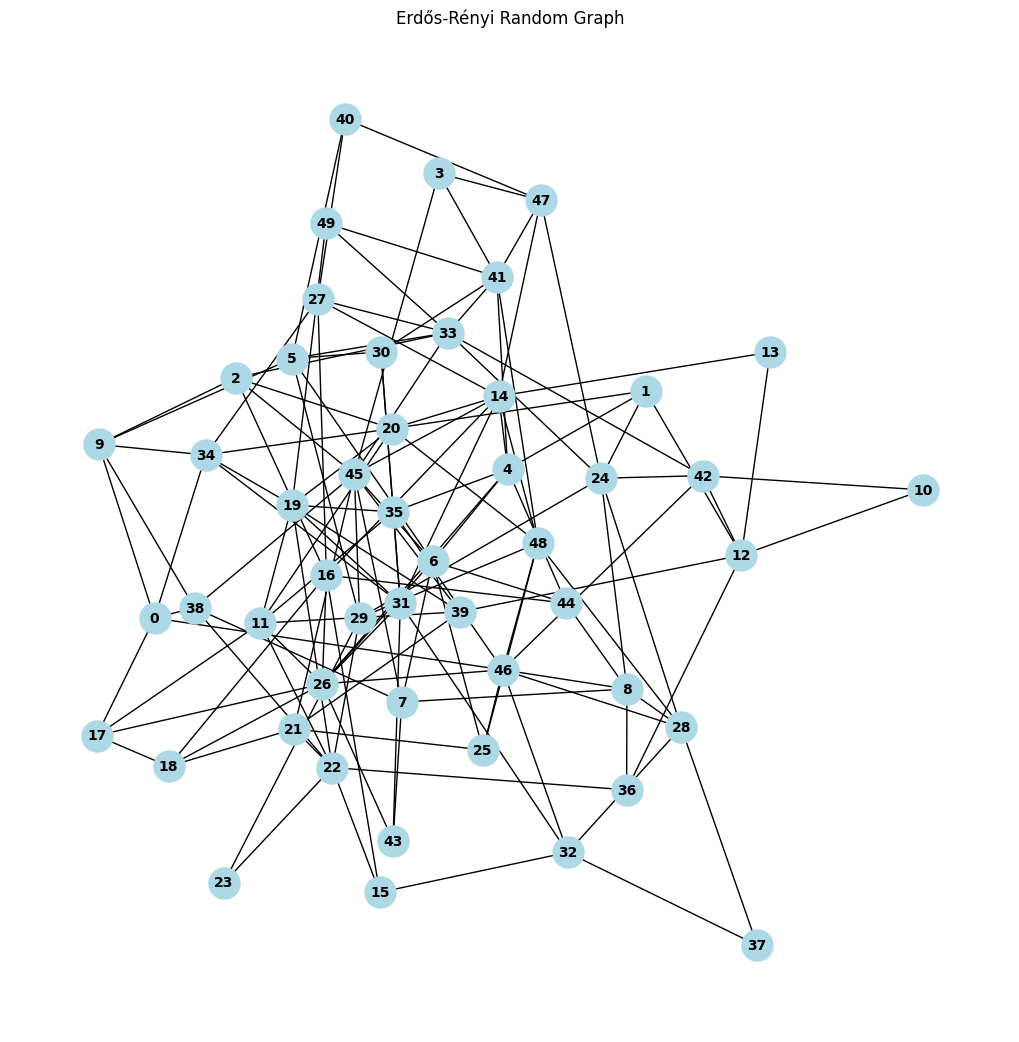

In [ ]:
import networkx as nx
graph = nx.erdos_renyi_graph(n,p)
pos = nx.spring_layout(graph)
plt.figure(figsize=(10, 10))
nx.draw(graph, pos, node_color='lightblue',
        with_labels=True, node_size=500, font_size=10, font_weight='bold')
plt.title("Erdős-Rényi Random Graph")
plt.show()

# todo


### B). Visualize the Node degree distrbution [refer assignemnt pdf for more detail]. [2 marks]

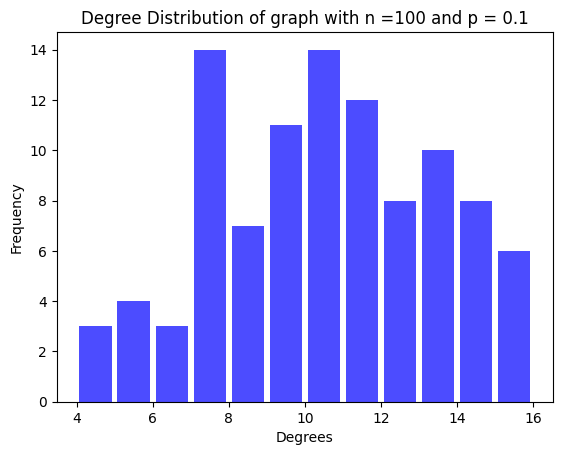

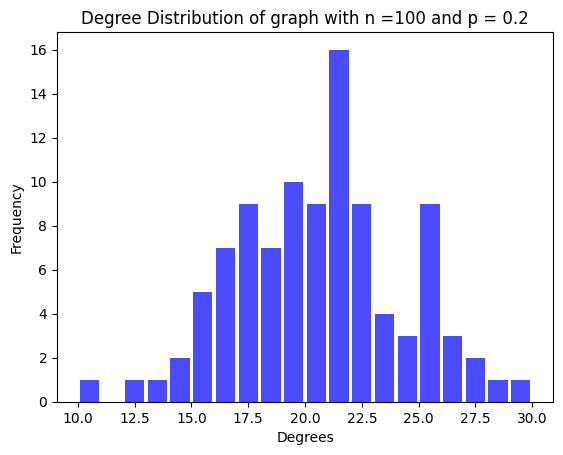

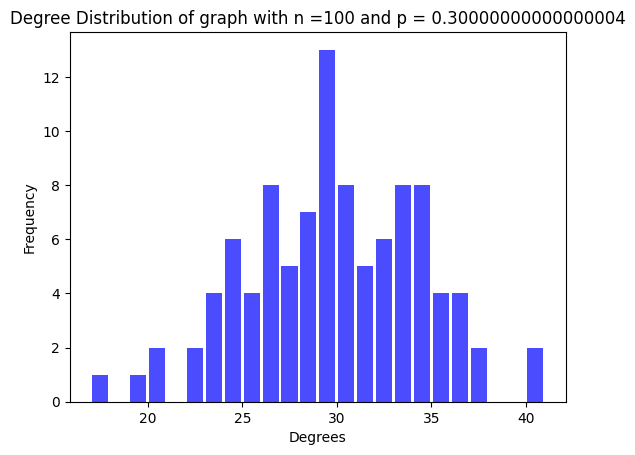

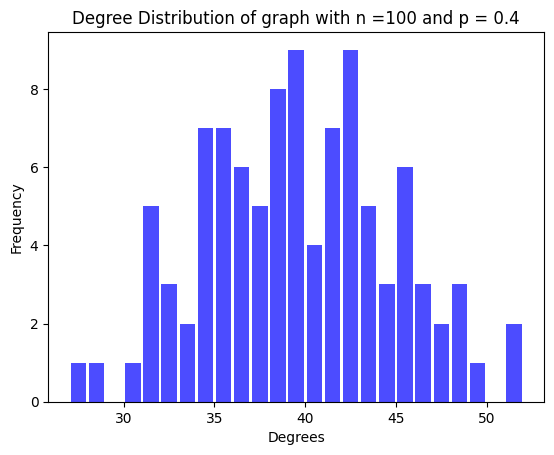

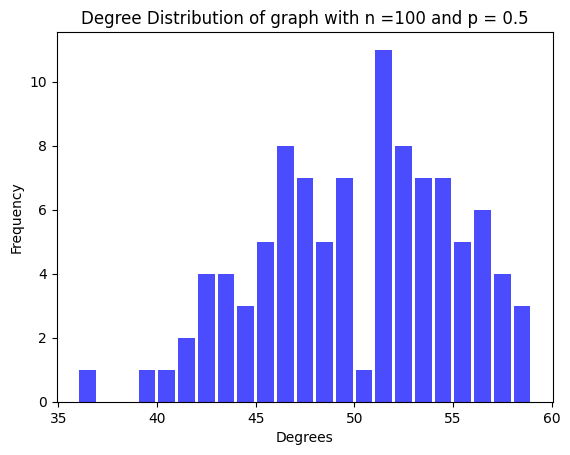

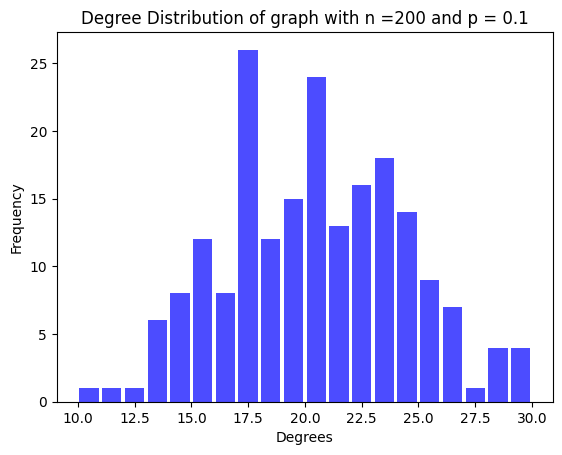

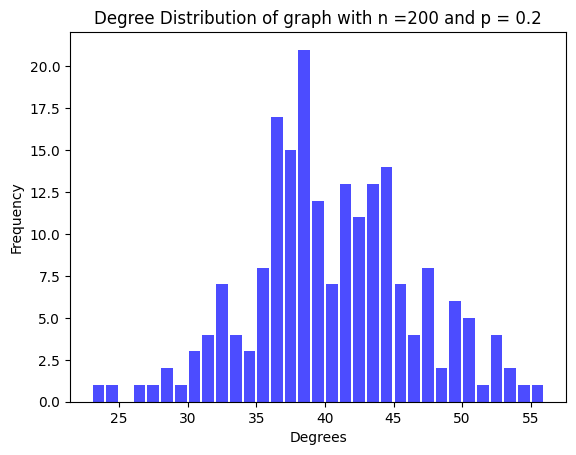

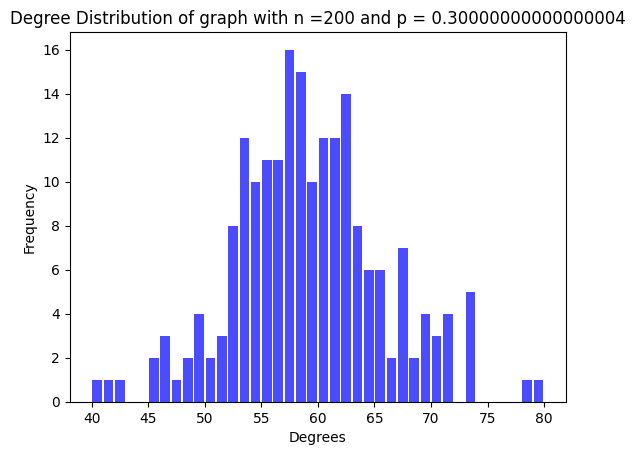

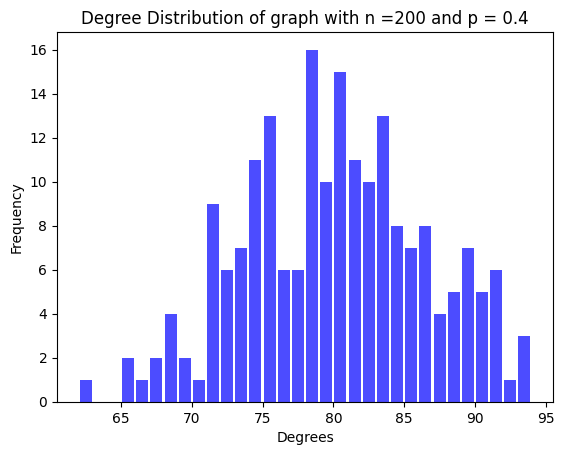

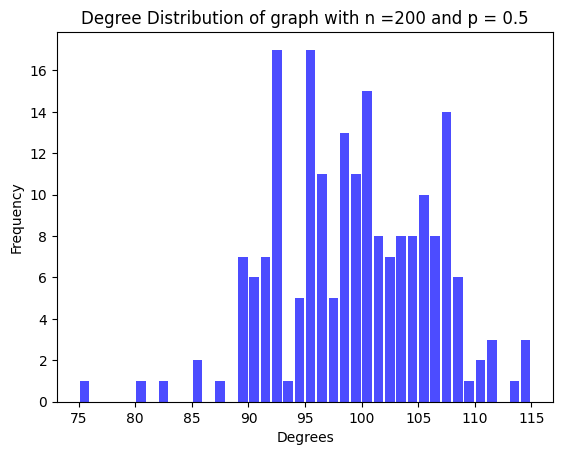

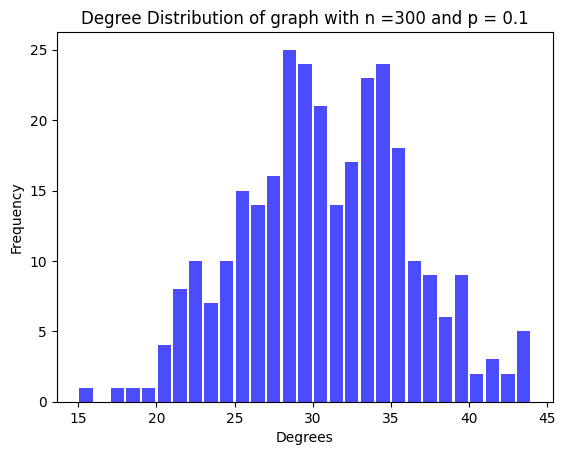

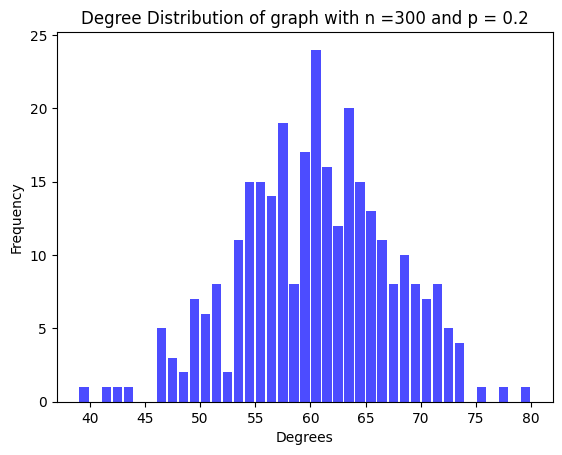

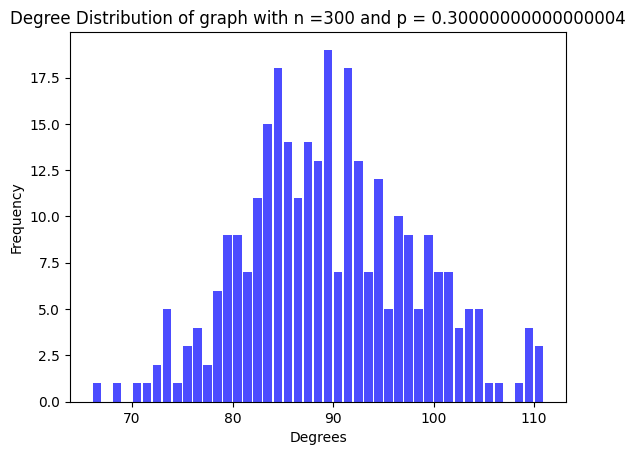

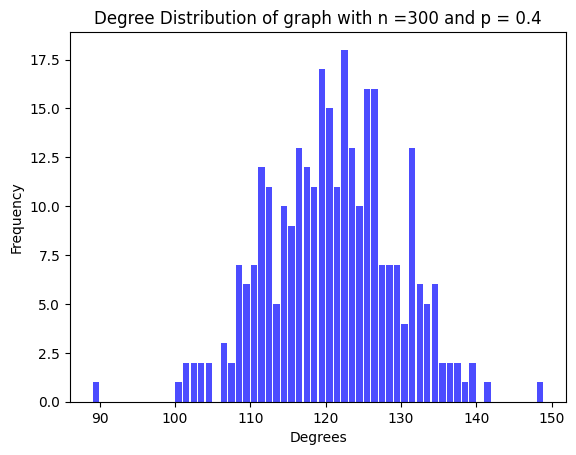

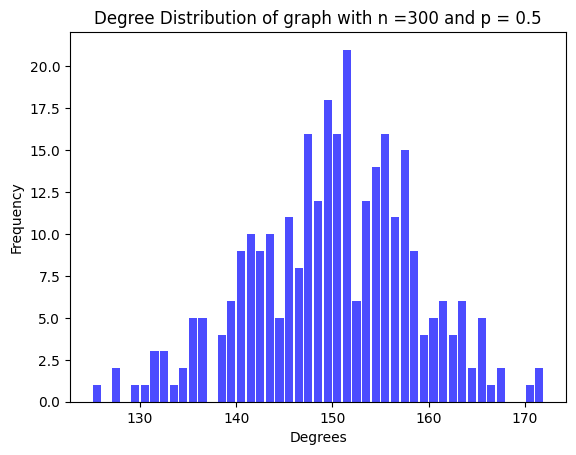

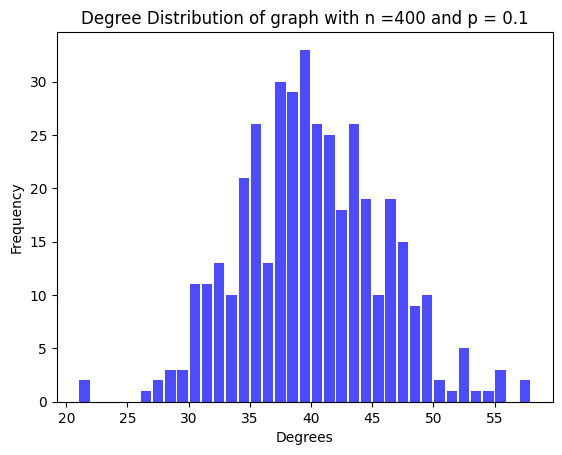

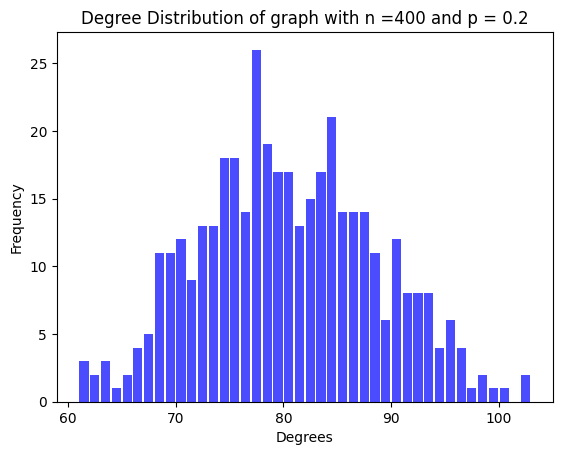

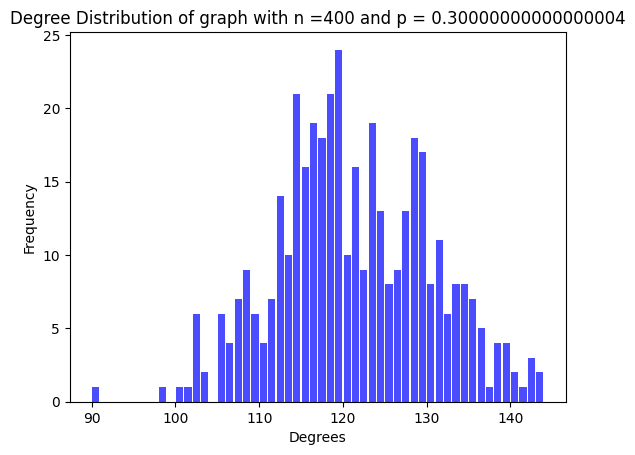

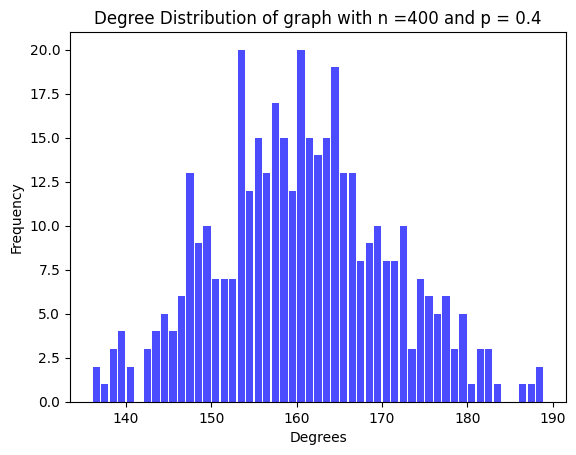

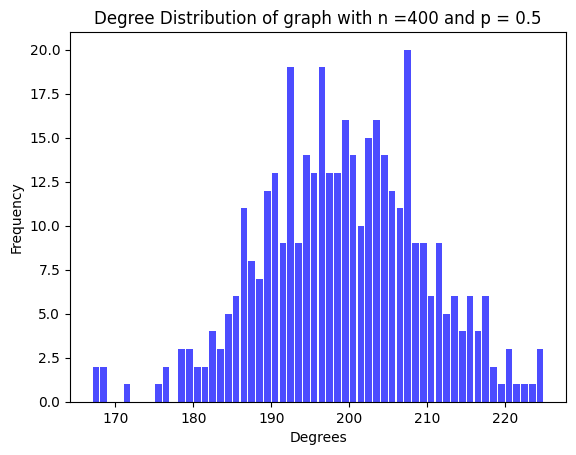

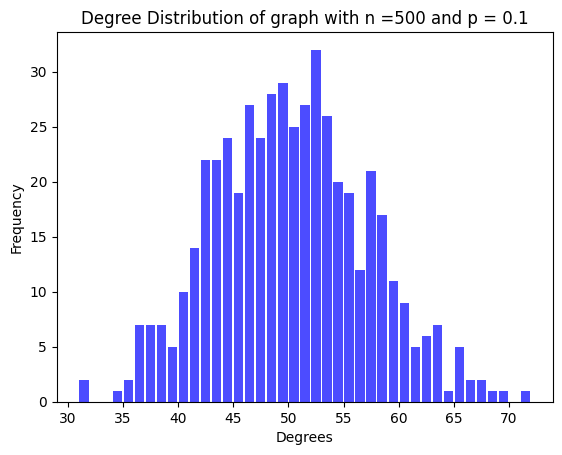

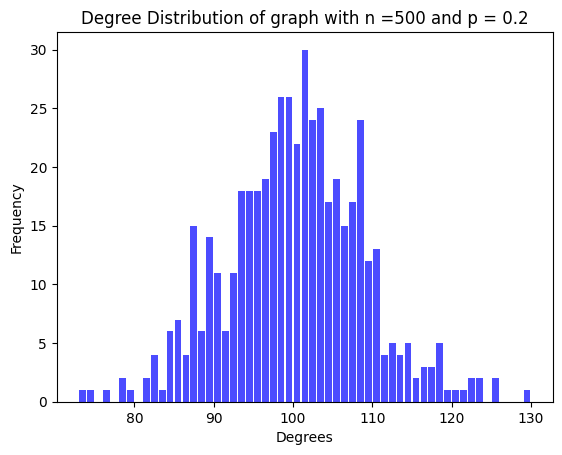

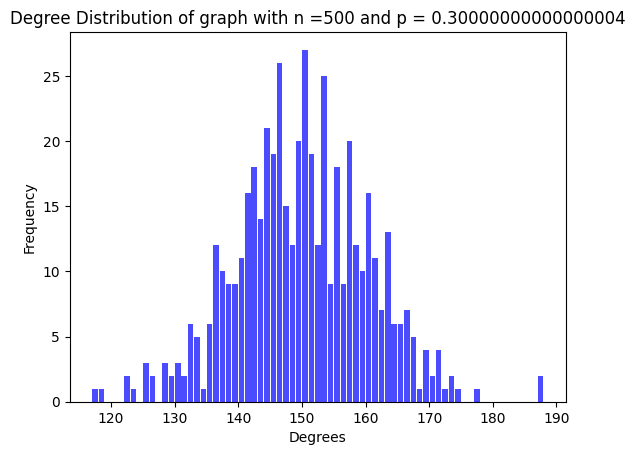

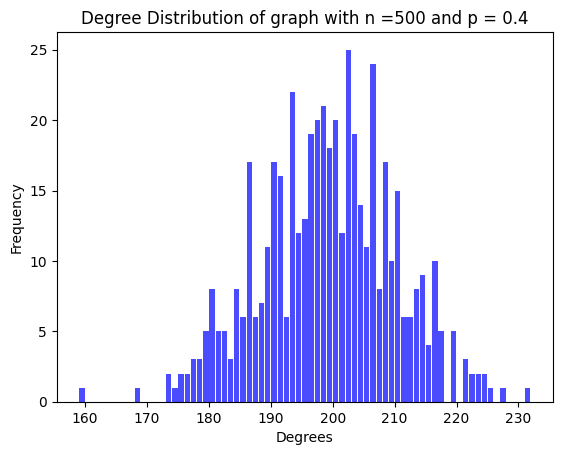

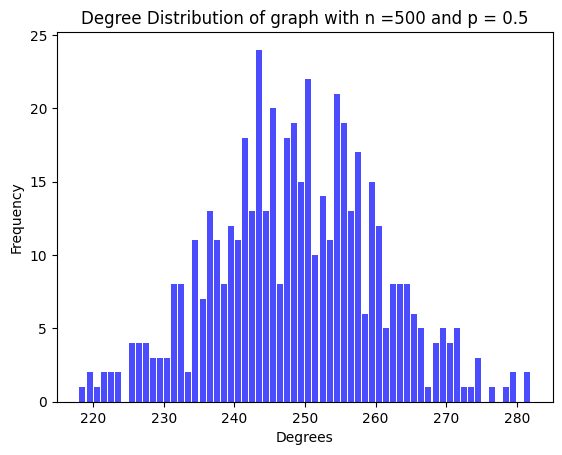

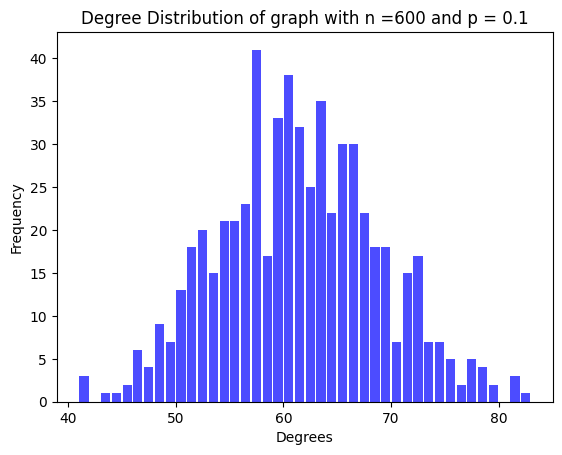

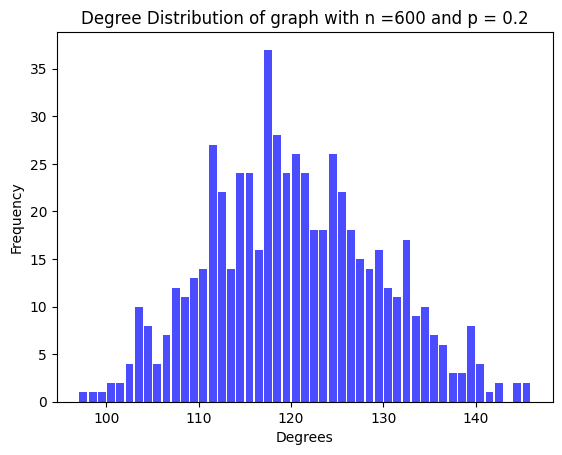

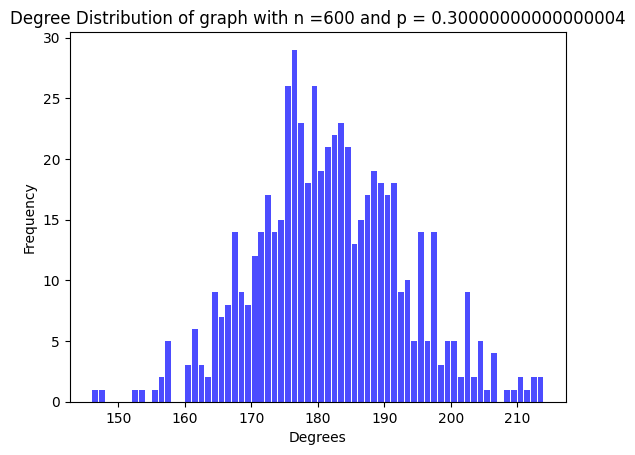

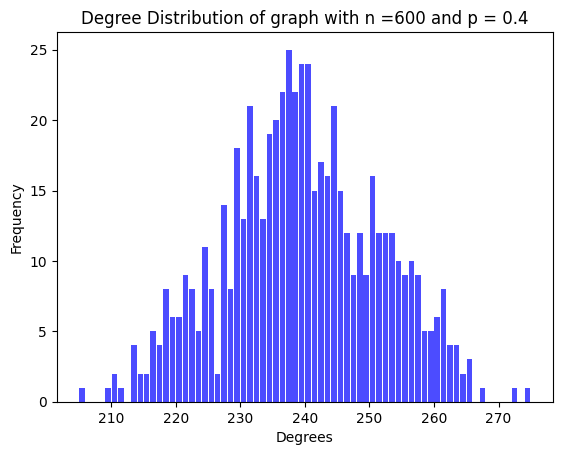

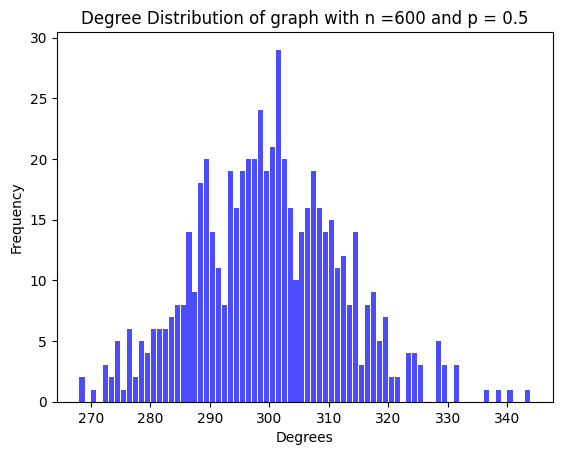

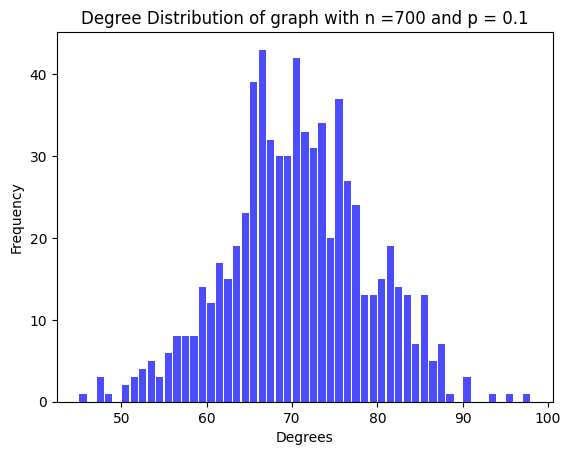

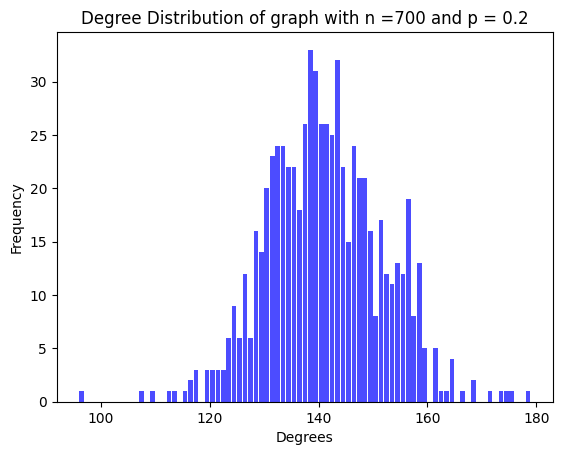

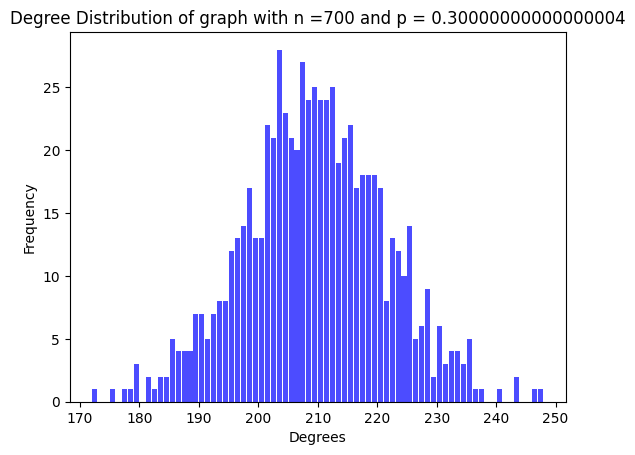

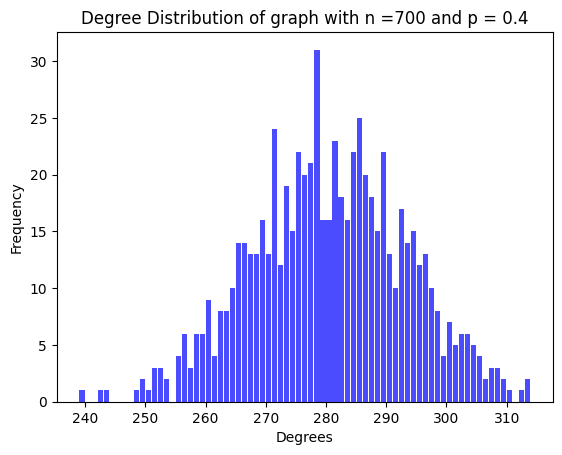

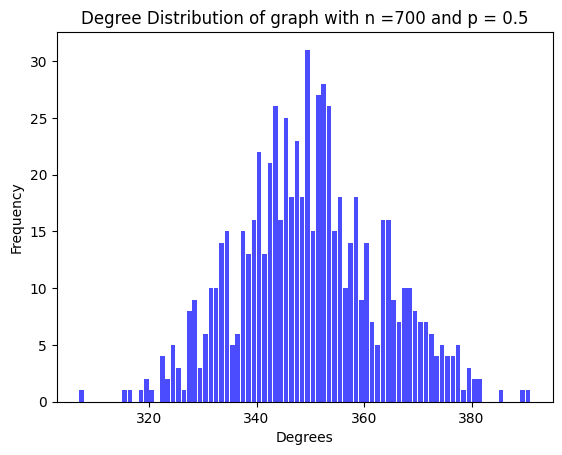

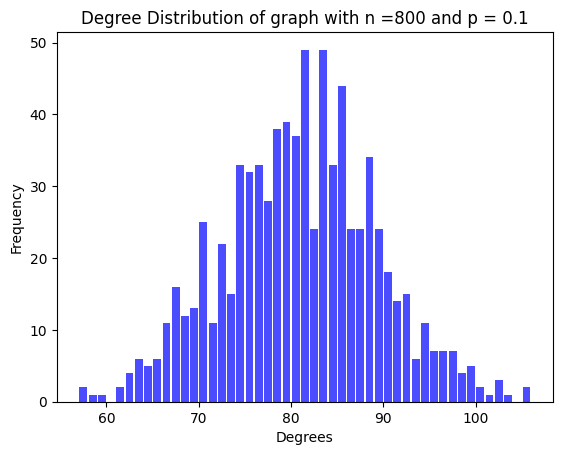

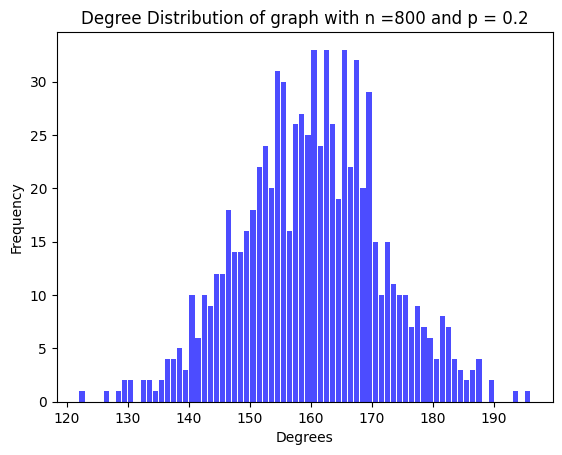

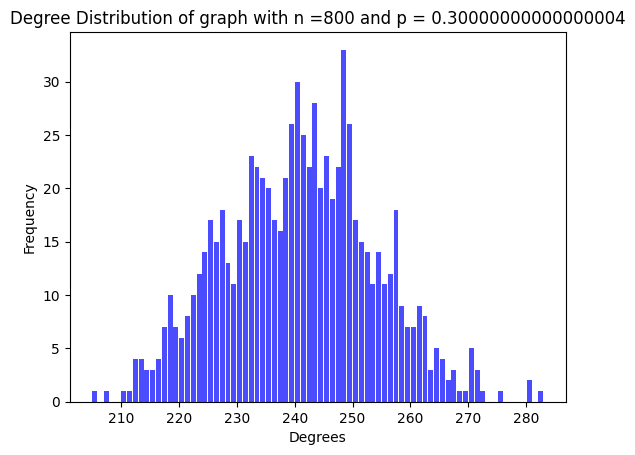

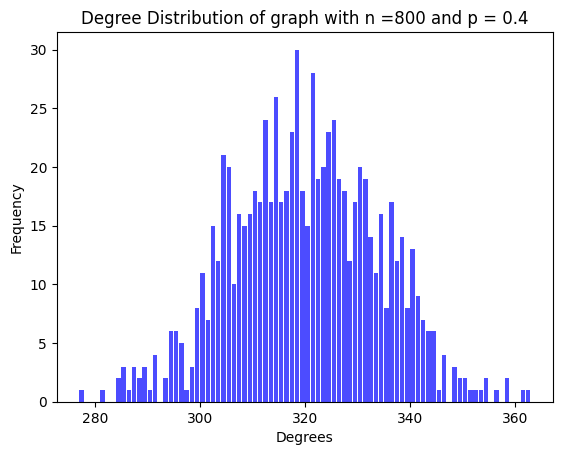

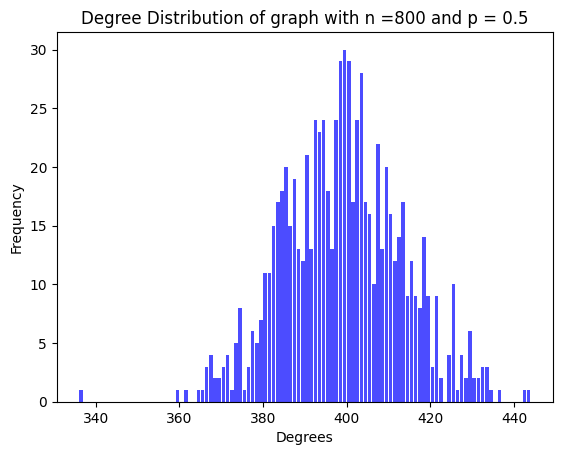

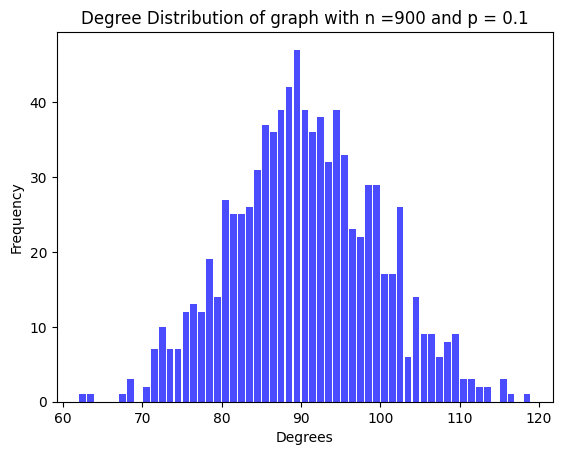

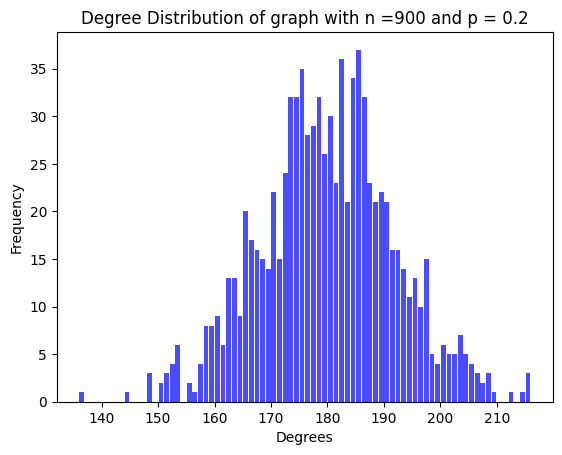

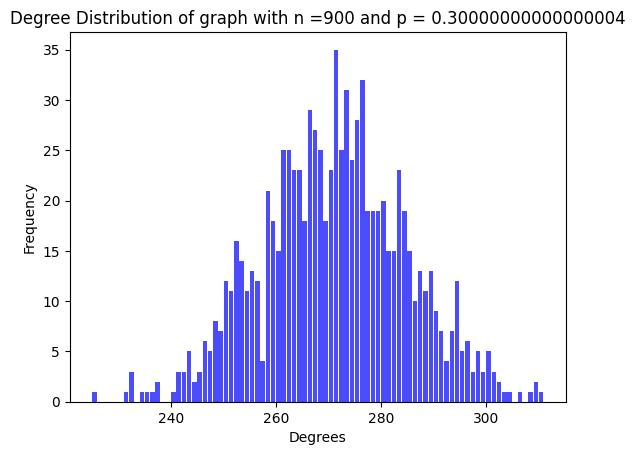

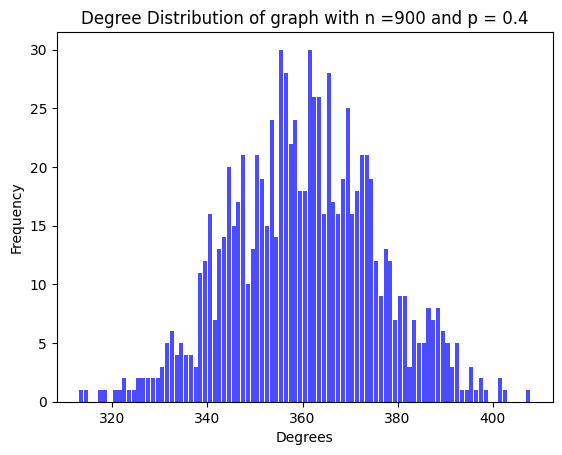

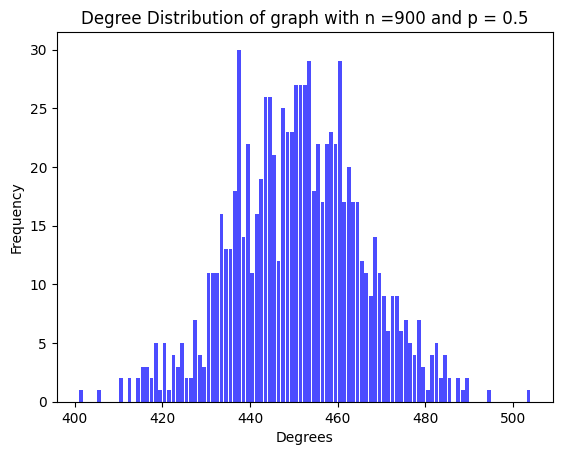

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
nodes = np.arange(100,1000,100)
probabilities = np.arange(0.1,0.6,0.1)
# plt.figure()
for n1 in nodes:
  for p1 in probabilities:
    graph = nx.erdos_renyi_graph(n1,p1)
    degrees = [i[1] for i in list(nx.degree(graph))]
    plt.hist(degrees, bins=np.arange(min(degrees), max(degrees) + 1), color='blue', alpha=0.7, rwidth=0.85)
    plt.xlabel("Degrees")
    plt.ylabel("Frequency")
    plt.title(f"Degree Distribution of graph with n ={n1} and p = {p1}")
    plt.show()
# code here

## Question: 2

Node classification task based on centrality measures.


### A.) Load the Graph and prepare the labels

- Load the network from torch_geometric.datasets repository
- Prepare one hot labels for each node.

### B.) Feature Engineering and Augmentation

- Compute the following features for each node:
    - Degree centrality
    - Eigenvector centrality
    - Betweenness centrality
    - Local clustering coefficient
    - Closeness centrality
    - PageRank
    - Katz Centrality
- Concatenate these features with existing node features (if available) in the dataset. Prepare a augmented feature for each node.

### C.) Neural Network for Node Classification.

- Preprocess the data and split into training (60%), validation (20%), and test (20%) sets.
- Implement a neural network for multi-class classification (please refer assignemnt pdf for more detail).


In [ ]:
! pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00


Epoch 0, Loss: 1.3923488855361938, Val Loss: 1.6208226680755615
Epoch 1, Loss: 1.5484799146652222, Val Loss: 3.476785182952881
Epoch 2, Loss: 2.9264490604400635, Val Loss: 3.8713197708129883
Epoch 3, Loss: 2.4110424518585205, Val Loss: 1.9436101913452148
Epoch 4, Loss: 1.5258146524429321, Val Loss: 2.131471633911133
Epoch 5, Loss: 1.921766996383667, Val Loss: 1.395583987236023
Epoch 6, Loss: 1.3862285614013672, Val Loss: 1.3923605680465698
Epoch 7, Loss: 1.3863823413848877, Val Loss: 1.419874668121338
Epoch 8, Loss: 1.385101318359375, Val Loss: 1.492277979850769
Epoch 9, Loss: 1.4171229600906372, Val Loss: 1.4325445890426636
Epoch 10, Loss: 1.4271736145019531, Val Loss: 1.3850905895233154
Epoch 11, Loss: 1.3880316019058228, Val Loss: 1.3856323957443237
Epoch 12, Loss: 1.3886882066726685, Val Loss: 1.3862786293029785
Epoch 13, Loss: 1.3891617059707642, Val Loss: 1.386824131011963
Epoch 14, Loss: 1.3895890712738037, Val Loss: 1.3870244026184082
Epoch 15, Loss: 1.3897755146026611, Val Los

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


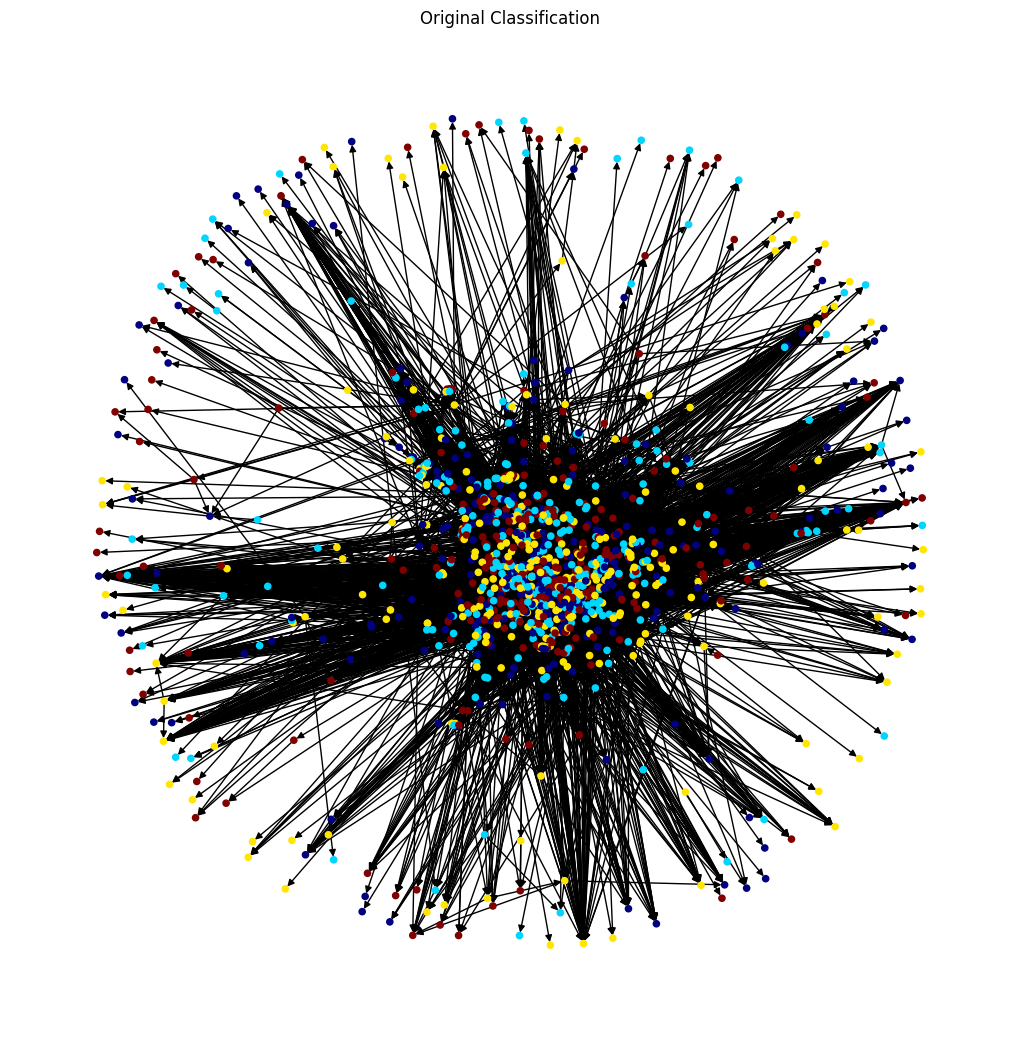

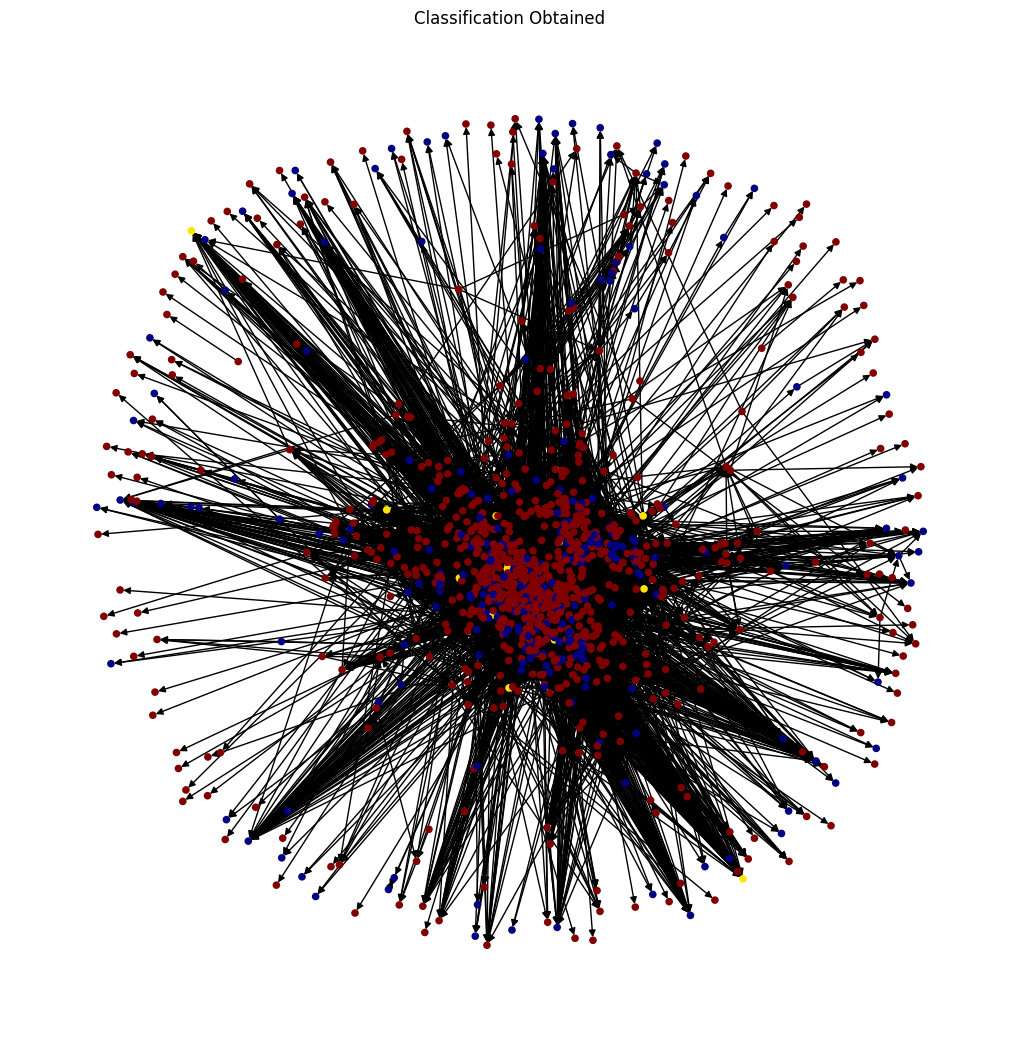

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
import pandas as pd
from google.colab import drive

#Load the Graph
def load_graph():
  # Write code to load graph
  G=nx.read_edgelist("usa-airports.edgelist", nodetype=int, create_using=nx.DiGraph())
  labels = pd.read_csv("labels-usa-airports.txt", delim_whitespace=True, header=None, names=['node_id','label'],skiprows=1)
  labels = labels.set_index('node_id')["label"]
  return [G,labels]

# One-hot Label
def prepare_onehot(y):
  # Write code to prepare one-hot label here
  one_hot_y=pd.get_dummies(y)
  return one_hot_y

# Feature Engineering
def compute_features(G):
  # Write code to prepare different node features here
  degree_centrality = nx.degree_centrality(G)
  eigenvector_centrality = nx.eigenvector_centrality(G,max_iter=1000)
  betweenness_centrality=nx.betweenness_centrality(G)
  clustering=nx.clustering(G)
  closeness_centrality=nx.closeness_centrality(G)
  page_rank=nx.pagerank(G)
  katz_centrality = nx.katz_centrality_numpy(G)
  node_features = np.array([[
    degree_centrality[node],
    eigenvector_centrality[node],
    betweenness_centrality[node],
    clustering[node],
    closeness_centrality[node],
    page_rank[node],
    katz_centrality[node]
] for node in G.nodes()])
  return node_features

# Neural Network for Node Classification
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        # Write your code here
        self.conv1 = torch.nn.Linear(input_dim,64)
        self.norm = torch_geometric.nn.BatchNorm(64)
        self.conv2 = torch.nn.Linear(64,16)
        self.conv3=torch.nn.Linear(16,4)
    def forward(self, data):
        # Write your code here
        x= self.conv1(data.x)
        x=self.norm(x)
        x=nn.functional.leaky_relu(x)
        x= self.conv2(x)
        x=nn.functional.leaky_relu(x)
        x= self.conv3(x)
        x=nn.functional.leaky_relu(x)
        x=nn.functional.log_softmax(x, dim=1)
        return x

# part 4: training

def train_and_evaluate(data):
    # Write your code for model training and evaluation here.
    # Print all losses and final test accuracy,precision,recall and F1-score
    model = SimpleNN(data.x.shape[1])
    optimizer = torch.optim.Adam(model.parameters(),lr=0.3)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(200):
      model.train()
      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output[data.train_mask],data.y[data.train_mask])
      loss.backward()
      optimizer.step()

      model.eval()
      with torch.no_grad():
        val_output=model(data)
        val_loss = criterion(val_output[data.val_mask],data.y[data.val_mask])
      print(f'Epoch {epoch}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')
    model.eval()
    with torch.no_grad():
        test_output = model(data)
        _, y_pred = test_output[data.test_mask].max(dim=1)
        test_acc = accuracy_score(torch.argmax(data.y[data.test_mask], dim=1), y_pred)
        precision = precision_score(torch.argmax(data.y[data.test_mask], dim=1), y_pred, average='weighted')
        recall = recall_score(torch.argmax(data.y[data.test_mask], dim=1), y_pred, average='weighted')
        f1 = f1_score(torch.argmax(data.y[data.test_mask], dim=1), y_pred, average='weighted')

        print(f'Test Accuracy: {test_acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')
    return  torch.argmax(model(data), dim=1)
# Main execution

if __name__ == '__main__':
  # Write your code in the following subsection

  # Generate graph
  graph=load_graph()
  data = torch_geometric.utils.from_networkx(graph[0])
  data.y=prepare_onehot(graph[1])
  # Compute features
  if data.x is not None:
    torch.cat([data.x,compute_features(graph[0])])
  else:
    data.x = compute_features(graph[0])
  # Split data
  split=torch_geometric.transforms.RandomNodeSplit(num_val=0.2, num_test=0.2)
  data=split(data)
  # Standardize features
  scaler = StandardScaler()
  data.x = scaler.fit_transform(data.x)
  # Convert to PyTorch tensors
  data.x = torch.tensor(data.x,dtype=torch.float)
  data.y = torch.tensor(data.y.values, dtype=torch.float)
  # Train and evaluate model
  result = train_and_evaluate(data)

  # Visualize results
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(graph[0])
  nx.draw(graph[0], pos, node_size=20, node_color=graph[1], cmap=plt.cm.jet)
  plt.title("Original Classification")
  plt.show()
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(graph[0])
  nx.draw(graph[0], pos, node_size=20, node_color=result.numpy(), cmap=plt.cm.jet)
  plt.title("Classification Obtained")
  plt.show()


#Brazil

Epoch 0, Loss: 1.3872616291046143, Val Loss: 1.540489912033081
Epoch 1, Loss: 1.406969666481018, Val Loss: 1.3371672630310059
Epoch 2, Loss: 1.3591445684432983, Val Loss: 1.3776133060455322
Epoch 3, Loss: 1.341607928276062, Val Loss: 1.3443325757980347
Epoch 4, Loss: 1.319287896156311, Val Loss: 1.2580469846725464
Epoch 5, Loss: 1.2757072448730469, Val Loss: 1.2841674089431763
Epoch 6, Loss: 1.2716604471206665, Val Loss: 1.2795660495758057
Epoch 7, Loss: 1.2046332359313965, Val Loss: 1.3517731428146362
Epoch 8, Loss: 1.1814613342285156, Val Loss: 1.4208621978759766
Epoch 9, Loss: 1.1639217138290405, Val Loss: 1.467904806137085
Epoch 10, Loss: 1.132182002067566, Val Loss: 1.50693941116333
Epoch 11, Loss: 1.1100261211395264, Val Loss: 1.5286355018615723
Epoch 12, Loss: 1.0965360403060913, Val Loss: 1.500944972038269
Epoch 13, Loss: 1.0597463846206665, Val Loss: 1.4974545240402222
Epoch 14, Loss: 1.0534658432006836, Val Loss: 1.5154712200164795
Epoch 15, Loss: 1.0228561162948608, Val Loss

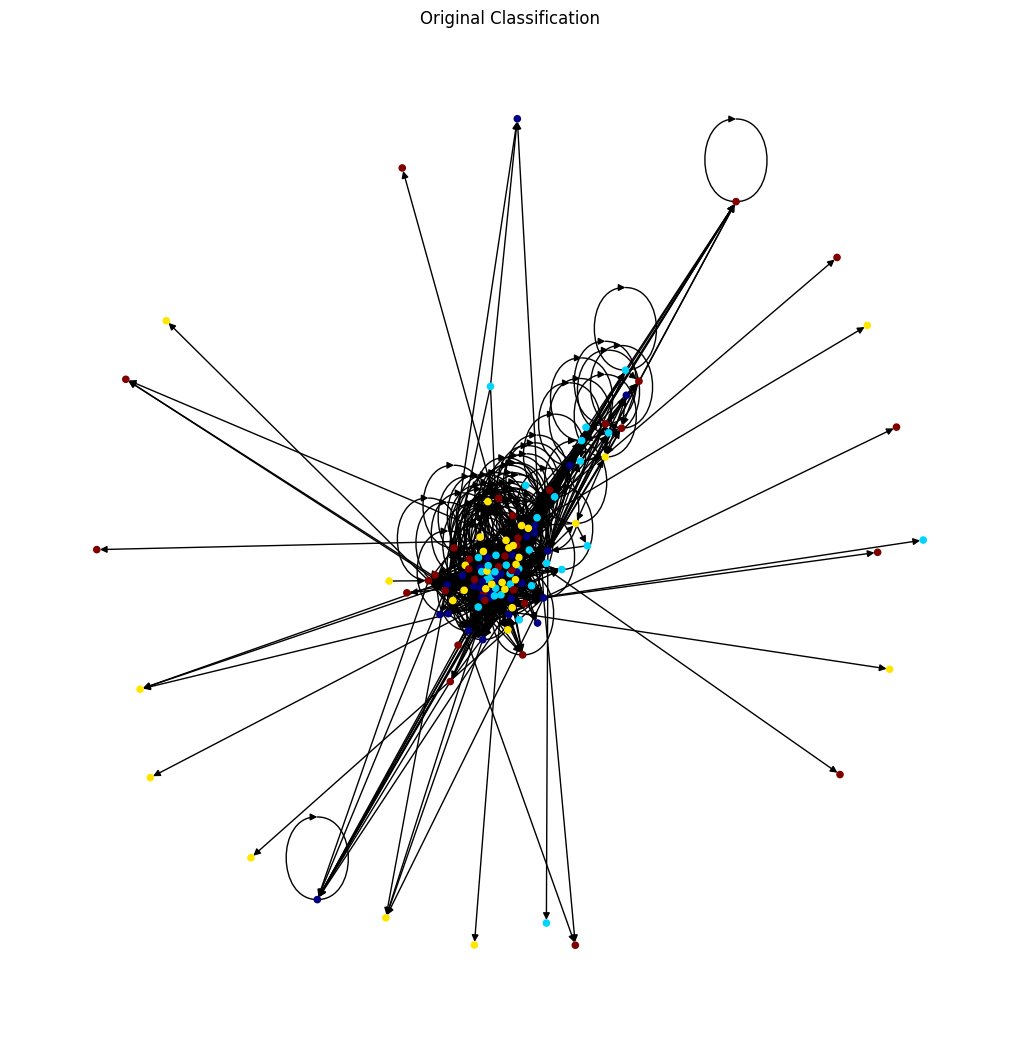

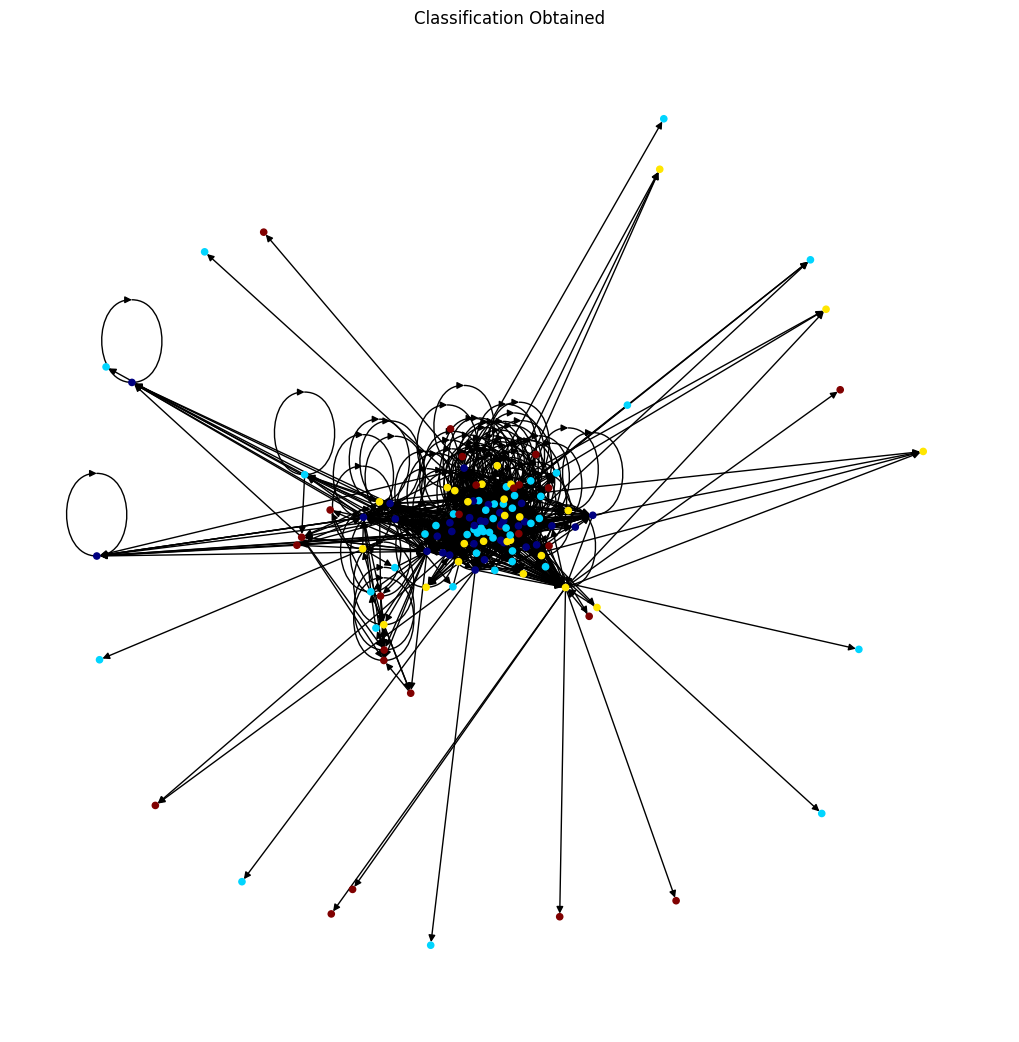

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
import pandas as pd
from google.colab import drive

#Load the Graph
def load_graph():
  # Write code to load graph
  G=nx.read_edgelist("brazil-airports.edgelist", nodetype=int, create_using=nx.DiGraph())
  labels = pd.read_csv("labels-brazil-airports.txt", delim_whitespace=True, header=None, names=['node_id','label'],skiprows=1)
  labels = labels.set_index('node_id')["label"]
  return [G,labels]

# One-hot Label
def prepare_onehot(y):
  # Write code to prepare one-hot label here
  one_hot_y=pd.get_dummies(y)
  return one_hot_y

# Feature Engineering
def compute_features(G):
  # Write code to prepare different node features here
  degree_centrality = nx.degree_centrality(G)
  eigenvector_centrality = nx.eigenvector_centrality(G,max_iter=1000)
  betweenness_centrality=nx.betweenness_centrality(G)
  clustering=nx.clustering(G)
  closeness_centrality=nx.closeness_centrality(G)
  page_rank=nx.pagerank(G)
  katz_centrality = nx.katz_centrality_numpy(G)
  node_features = np.array([[
    degree_centrality[node],
    eigenvector_centrality[node],
    betweenness_centrality[node],
    clustering[node],
    closeness_centrality[node],
    page_rank[node],
    # katz_centrality[node]
] for node in G.nodes()])
  return node_features

# Neural Network for Node Classification
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        # Write your code here
        self.conv1 = torch.nn.Linear(input_dim,500)
        # self.norm = torch.nn.BatchNorm(64)
        self.conv2 = torch.nn.Linear(500,64)
        self.conv3=torch.nn.Linear(64,4)
    def forward(self, data):
        # Write your code here
        x= self.conv1(data.x)
        # x=self.norm(x)
        x=nn.functional.leaky_relu(x)
        x= self.conv2(x)
        x=nn.functional.leaky_relu(x)
        x= self.conv3(x)
        x=nn.functional.leaky_relu(x)
        x=nn.functional.log_softmax(x, dim=1)
        return x

# part 4: training

def train_and_evaluate(data):
    # Write your code for model training and evaluation here.
    # Print all losses and final test accuracy,precision,recall and F1-score
    model = SimpleNN(data.x.shape[1])
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(200):
      model.train()
      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output[data.train_mask],data.y[data.train_mask])
      loss.backward()
      optimizer.step()

      model.eval()
      with torch.no_grad():
        val_output=model(data)
        val_loss = criterion(val_output[data.val_mask],data.y[data.val_mask])
      print(f'Epoch {epoch}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')
    model.eval()
    with torch.no_grad():
        test_output = model(data)
        _, y_pred = test_output[data.test_mask].max(dim=1)
        test_acc = accuracy_score(torch.argmax(data.y[data.test_mask], dim=1), y_pred)
        precision = precision_score(torch.argmax(data.y[data.test_mask], dim=1), y_pred, average='weighted')
        recall = recall_score(torch.argmax(data.y[data.test_mask], dim=1), y_pred, average='weighted')
        f1 = f1_score(torch.argmax(data.y[data.test_mask], dim=1), y_pred, average='weighted')

        print(f'Test Accuracy: {test_acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')
    return  torch.argmax(model(data), dim=1)
# Main execution

if __name__ == '__main__':
  # Write your code in the following subsection

  # Generate graph
  graph=load_graph()
  data = torch_geometric.utils.from_networkx(graph[0])
  data.y=prepare_onehot(graph[1])
  # Compute features
  if data.x is not None:
    torch.cat([data.x,compute_features(graph[0])])
  else:
    data.x = compute_features(graph[0])
  # Split data
  split=torch_geometric.transforms.RandomNodeSplit(num_val=0.2, num_test=0.2)
  data=split(data)
  # Standardize features
  scaler = StandardScaler()
  data.x = scaler.fit_transform(data.x)
  # Convert to PyTorch tensors
  data.x = torch.tensor(data.x,dtype=torch.float)
  data.y = torch.tensor(data.y.values, dtype=torch.float)
  # Train and evaluate model
  result = train_and_evaluate(data)

  # Visualize results
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(graph[0])
  nx.draw(graph[0], pos, node_size=20, node_color=graph[1], cmap=plt.cm.jet)
  plt.title("Original Classification")
  plt.show()
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(graph[0])
  nx.draw(graph[0], pos, node_size=20, node_color=result.numpy(), cmap=plt.cm.jet)
  plt.title("Classification Obtained")
  plt.show()


#Europe

Epoch 0, Loss: 1.4664900302886963, Val Loss: 1.387772560119629
Epoch 1, Loss: 1.3809229135513306, Val Loss: 1.387164831161499
Epoch 2, Loss: 1.3761030435562134, Val Loss: 1.385887861251831
Epoch 3, Loss: 1.3744175434112549, Val Loss: 1.3842127323150635
Epoch 4, Loss: 1.372052550315857, Val Loss: 1.3826156854629517
Epoch 5, Loss: 1.369511604309082, Val Loss: 1.3801804780960083
Epoch 6, Loss: 1.3650656938552856, Val Loss: 1.3744852542877197
Epoch 7, Loss: 1.3523669242858887, Val Loss: 1.363939642906189
Epoch 8, Loss: 1.3344619274139404, Val Loss: 1.35207200050354
Epoch 9, Loss: 1.3296159505844116, Val Loss: 1.3458439111709595
Epoch 10, Loss: 1.3378905057907104, Val Loss: 1.3446364402770996
Epoch 11, Loss: 1.3344265222549438, Val Loss: 1.3466970920562744
Epoch 12, Loss: 1.3264721632003784, Val Loss: 1.3480374813079834
Epoch 13, Loss: 1.3218843936920166, Val Loss: 1.348473072052002
Epoch 14, Loss: 1.3202639818191528, Val Loss: 1.3480333089828491
Epoch 15, Loss: 1.3189083337783813, Val Loss

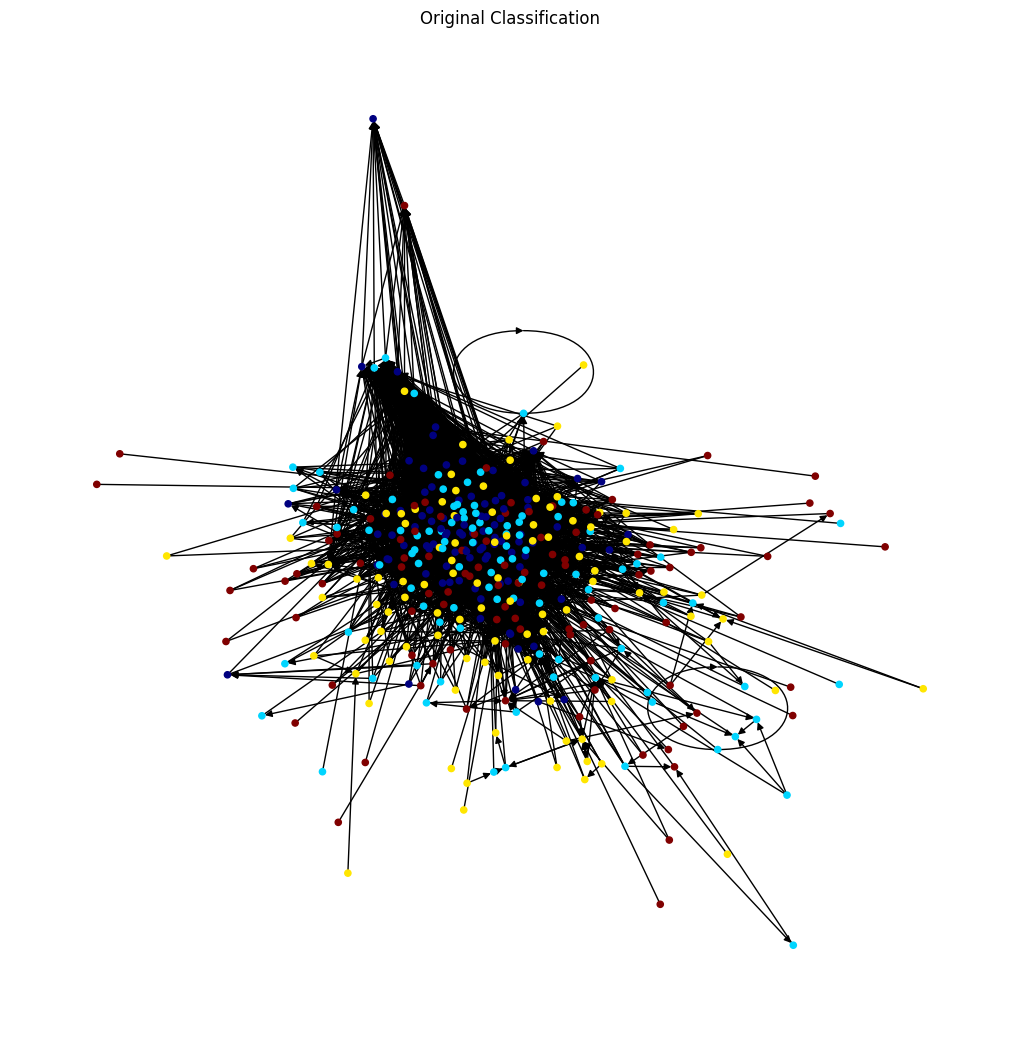

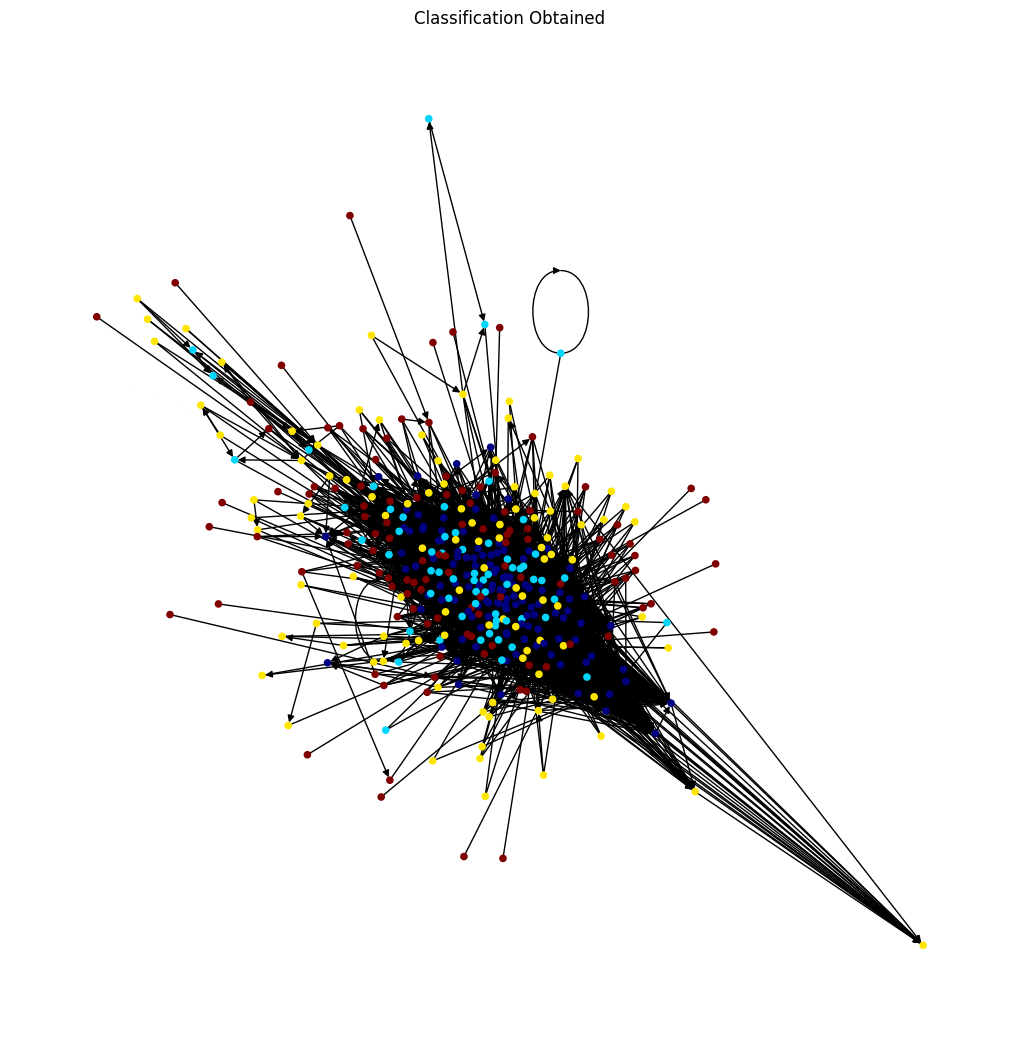

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
import pandas as pd
from google.colab import drive

#Load the Graph
def load_graph():
  # Write code to load graph
  G=nx.read_edgelist("europe-airports.edgelist", nodetype=int, create_using=nx.DiGraph())
  labels = pd.read_csv("labels-europe-airports.txt", delim_whitespace=True, header=None, names=['node_id','label'],skiprows=1)
  labels = labels.set_index('node_id')["label"]
  return [G,labels]

# One-hot Label
def prepare_onehot(y):
  # Write code to prepare one-hot label here
  one_hot_y=pd.get_dummies(y)
  return one_hot_y

# Feature Engineering
def compute_features(G):
  # Write code to prepare different node features here
  degree_centrality = nx.degree_centrality(G)
  eigenvector_centrality = nx.eigenvector_centrality(G,max_iter=1000)
  betweenness_centrality=nx.betweenness_centrality(G)
  clustering=nx.clustering(G)
  closeness_centrality=nx.closeness_centrality(G)
  page_rank=nx.pagerank(G)
  katz_centrality = nx.katz_centrality_numpy(G)
  node_features = np.array([[
    degree_centrality[node],
    eigenvector_centrality[node],
    betweenness_centrality[node],
    clustering[node],
    closeness_centrality[node],
    page_rank[node],
    katz_centrality[node]
] for node in G.nodes()])
  return node_features

# Neural Network for Node Classification
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        # Write your code here
        self.conv1 = torch_geometric.nn.GCNConv(input_dim,64)
        self.norm = torch_geometric.nn.BatchNorm(64)
        self.conv2 = torch_geometric.nn.GCNConv(64,16)
        self.conv3=torch_geometric.nn.GCNConv(16,4)
    def forward(self, data):
        # Write your code here
        x= self.conv1(data.x,data.edge_index)
        x=self.norm(x)
        x=nn.functional.leaky_relu(x)
        x= self.conv2(x,data.edge_index)
        x=nn.functional.leaky_relu(x)
        x= self.conv3(x,data.edge_index)
        x=nn.functional.leaky_relu(x)
        x=nn.functional.log_softmax(x, dim=1)
        return x

# part 4: training

def train_and_evaluate(data):
    # Write your code for model training and evaluation here.
    # Print all losses and final test accuracy,precision,recall and F1-score
    model = SimpleNN(data.x.shape[1])
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(200):
      model.train()
      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output[data.train_mask],data.y[data.train_mask])
      loss.backward()
      optimizer.step()

      model.eval()
      with torch.no_grad():
        val_output=model(data)
        val_loss = criterion(val_output[data.val_mask],data.y[data.val_mask])
      print(f'Epoch {epoch}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')
    model.eval()
    with torch.no_grad():
        test_output = model(data)
        _, y_pred = test_output[data.test_mask].max(dim=1)
        test_acc = accuracy_score(torch.argmax(data.y[data.test_mask], dim=1), y_pred)
        precision = precision_score(torch.argmax(data.y[data.test_mask], dim=1), y_pred, average='weighted')
        recall = recall_score(torch.argmax(data.y[data.test_mask], dim=1), y_pred, average='weighted')
        f1 = f1_score(torch.argmax(data.y[data.test_mask], dim=1), y_pred, average='weighted')

        print(f'Test Accuracy: {test_acc}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}')
    return  torch.argmax(model(data), dim=1)
# Main execution

if __name__ == '__main__':
  # Write your code in the following subsection

  # Generate graph
  graph=load_graph()
  data = torch_geometric.utils.from_networkx(graph[0])
  data.y=prepare_onehot(graph[1])
  # Compute features
  if data.x is not None:
    torch.cat([data.x,compute_features(graph[0])])
  else:
    data.x = compute_features(graph[0])
  # Split data
  split=torch_geometric.transforms.RandomNodeSplit(num_val=0.2, num_test=0.2)
  data=split(data)
  # Standardize features
  scaler = StandardScaler()
  data.x = scaler.fit_transform(data.x)
  # Convert to PyTorch tensors
  data.x = torch.tensor(data.x,dtype=torch.float)
  data.y = torch.tensor(data.y.values, dtype=torch.float)
  # Train and evaluate model
  result = train_and_evaluate(data)

  # Visualize results
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(graph[0])
  nx.draw(graph[0], pos, node_size=20, node_color=graph[1], cmap=plt.cm.jet)
  plt.title("Original Classification")
  plt.show()
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(graph[0])
  nx.draw(graph[0], pos, node_size=20, node_color=result.numpy(), cmap=plt.cm.jet)
  plt.title("Classification Obtained")
  plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question: 3

Graph Classification based on Graphlet Degree Vector.

Perform a graph classification task based on graphlet degree vector count  for the NCI109 dataset from the TUDataset collection. The NCI109 dataset is a collection of 4,127 chemical compounds, where each graph represents a compound, and the nodes and edges represent atoms and bonds. Each graph in the dataset is labelled as either "active" or "inactive" against a specific cancer cell line, indicating whether the chemical compound is bioactive or not.

### A.)Extract the specific graphlet degree vector counts for each graph and take them as feature vectors for performing the graph classification task.

**Types of Graphlets**

1. G1: Triangle
2. G2: Hexagon
3. G3: Pentagon
4. G4: K4 (complete subgraphs of size 4)
5. G5: K5 (complete subgraphs of size 5)
6. G6: 6-node clique
7. G7: 4-cycle (C4)
8. G8: Star (a center node with more than 2 connections).
9. G9: Chains(linear sequences of 3 nodes or more)

For each graph, report the graphlet counts.


### B.) Graph Classification Setup:
- Implement a 3-layer simple feedforward neural network with 64 hidden layer dimensions. Standardise the features of the dataset. Split the dataset into 80% train set and 20% test set. Use the ADAM optimizer with a learning rate of 0.001. Train the model for 200 epochs and report the model's performance metrics.
- Visualize the  classification results and the features of the graphs that are important for the prediction of a chemical compound that is bioactive or not.

In [ ]:
pip install --upgrade torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00


In [ ]:
pip install fsspec==2022.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.15.0 requires fsspec>=2023.3.0, but you have fsspec 2022.10.0 which is incompatible.
gcsfs 2024.6.1 requires fsspec==2024.6.1, but you have fsspec 2022.10.0 which is incompatible.
huggingface-hub 0.23.5 requires fsspec>=2023.5.0, but you have fsspec 2022.10.0 which is incompatible.


4127


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


[0. 2. 1. 0. 0. 0. 0. 9. 0.]
[0. 1. 1. 0. 0. 0. 0. 8. 0.]
[0. 1. 0. 0. 0. 0. 0. 4. 0.]
[0. 1. 0. 0. 0. 0. 0. 7. 0.]
[ 0.  5.  0.  0.  0.  0.  0. 24.  0.]
[0. 1. 1. 0. 0. 0. 0. 5. 0.]
[0. 1. 0. 0. 0. 0. 0. 6. 0.]
[0. 3. 0. 0. 0. 0. 0. 6. 0.]
[0. 3. 0. 0. 0. 0. 0. 7. 0.]
[0. 2. 0. 0. 0. 0. 0. 6. 0.]
[0. 1. 0. 0. 0. 0. 0. 4. 0.]
[0. 0. 1. 0. 0. 0. 0. 2. 0.]
[ 0.  4.  0.  0.  0.  0.  0. 10.  0.]
[0. 2. 0. 0. 0. 0. 0. 6. 0.]
[0. 2. 1. 0. 0. 0. 0. 9. 0.]
[0. 4. 0. 0. 0. 0. 0. 9. 0.]
[0. 3. 0. 0. 0. 0. 0. 6. 0.]
[0. 1. 1. 0. 0. 0. 0. 6. 0.]
[0. 2. 1. 0. 0. 0. 0. 7. 0.]
[0. 1. 2. 0. 0. 0. 0. 7. 0.]
[0. 3. 0. 0. 0. 0. 0. 7. 0.]
[0. 1. 0. 0. 0. 0. 0. 6. 0.]
[0. 2. 0. 0. 0. 0. 0. 8. 0.]
[0. 2. 0. 0. 0. 0. 0. 7. 0.]
[0. 1. 1. 0. 0. 0. 0. 8. 0.]
[0. 2. 1. 0. 0. 0. 0. 8. 0.]
[ 0.  2.  2.  0.  0.  0.  0. 10.  0.]
[0. 4. 0. 0. 0. 0. 0. 9. 0.]
[0. 2. 0. 0. 0. 0. 0. 8. 0.]
[0. 0. 0. 0. 0. 0. 0. 2. 0.]
[0. 2. 0. 0. 0. 0. 0. 8. 0.]
[ 0.  2.  2.  0.  0.  0.  0. 18.  0.]
[ 0.  1.  1.  0.  0.  0.  0. 12.  0.

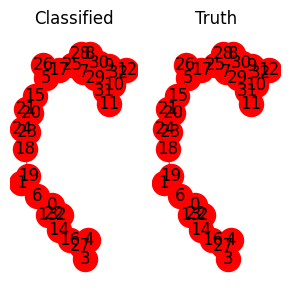

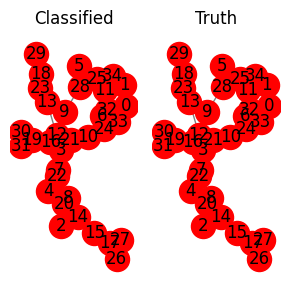

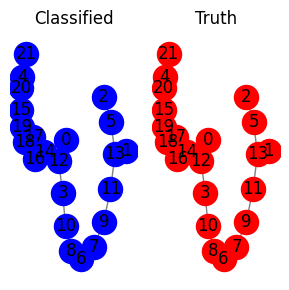

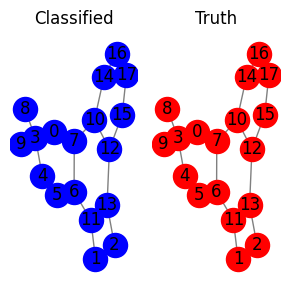

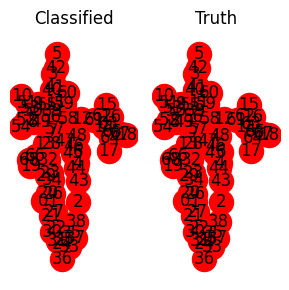

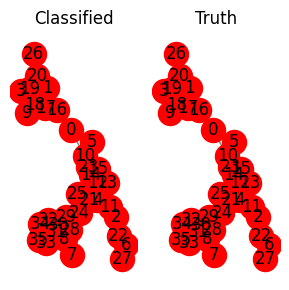

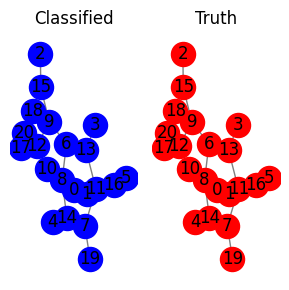

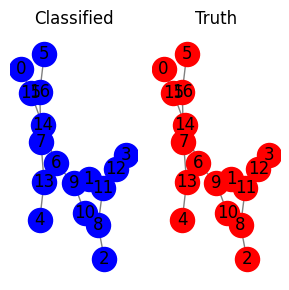

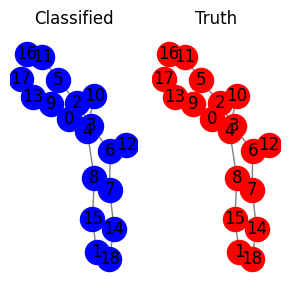

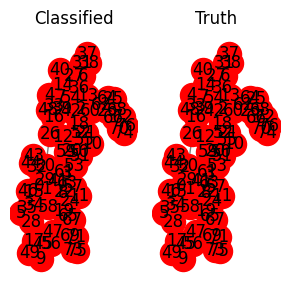

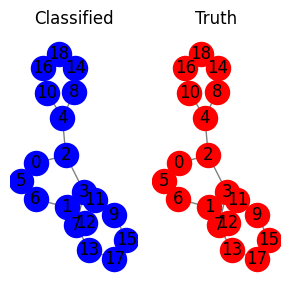

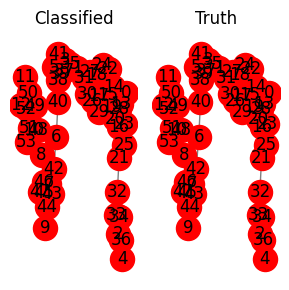

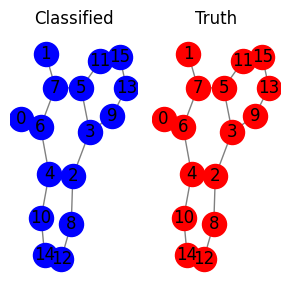

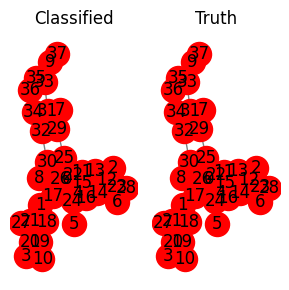

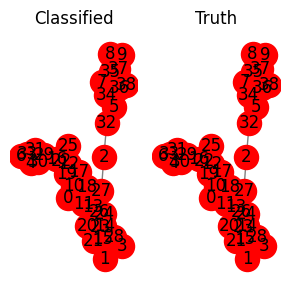

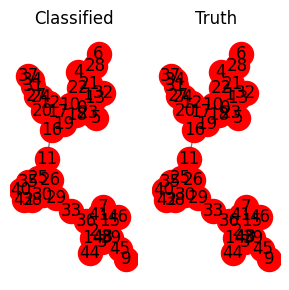

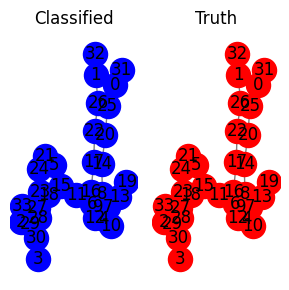

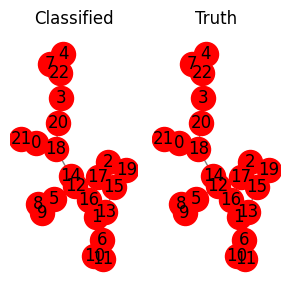

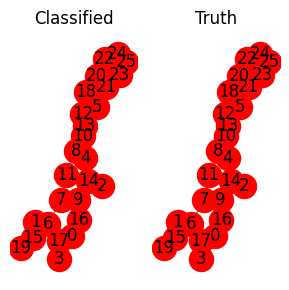

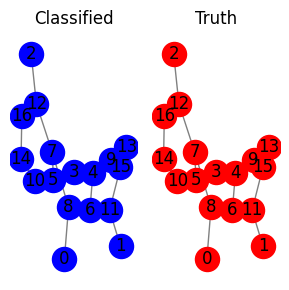

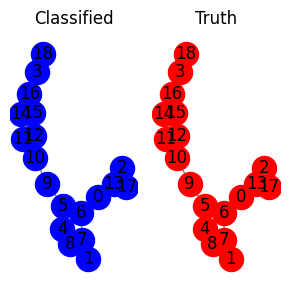

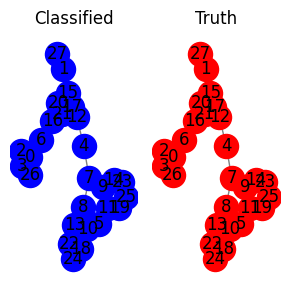

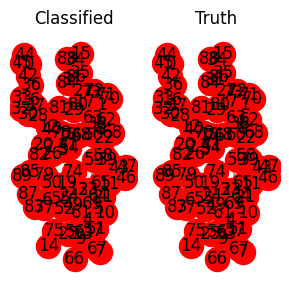

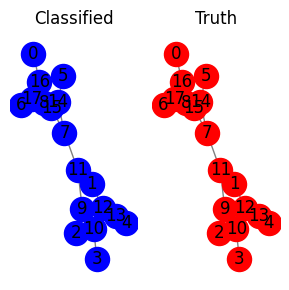

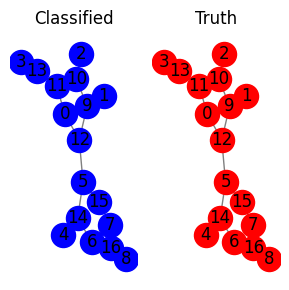

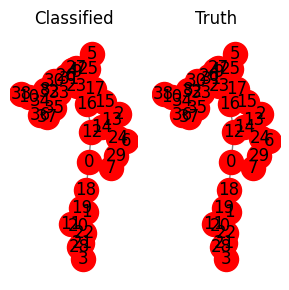

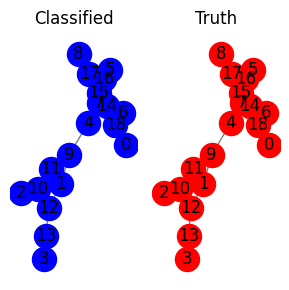

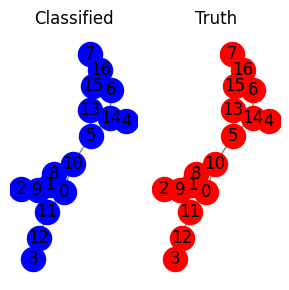

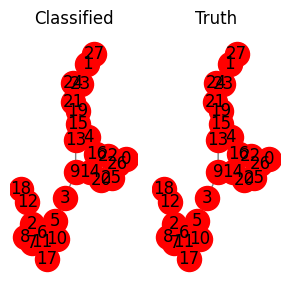

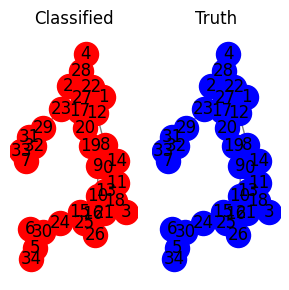

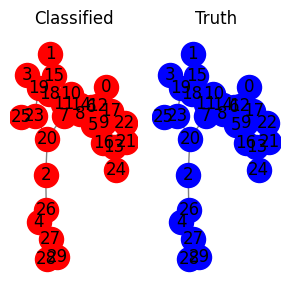

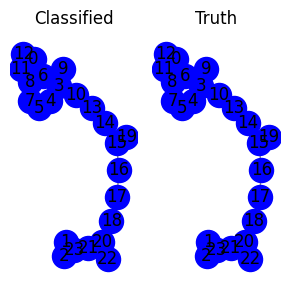

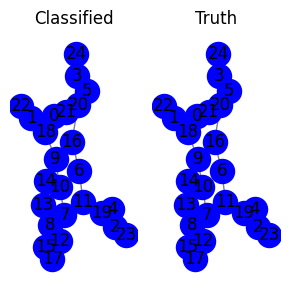

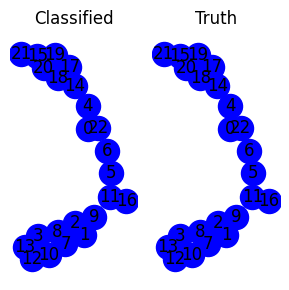

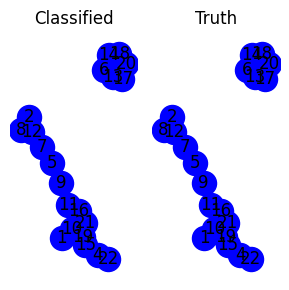

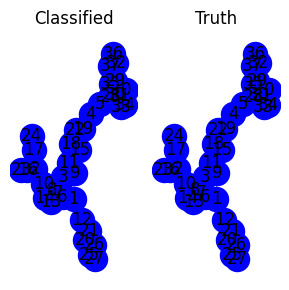

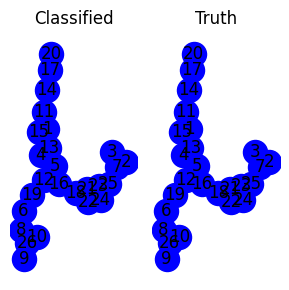

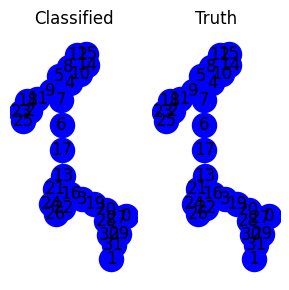

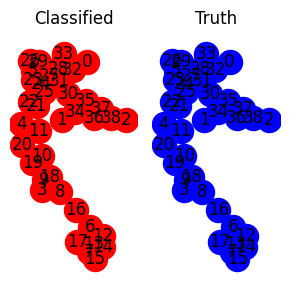

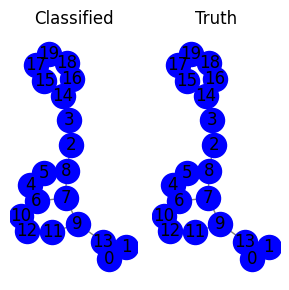

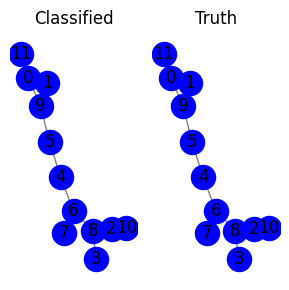

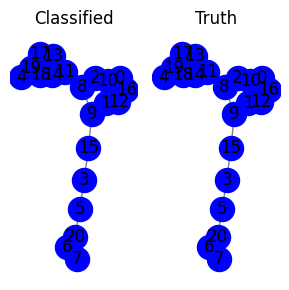

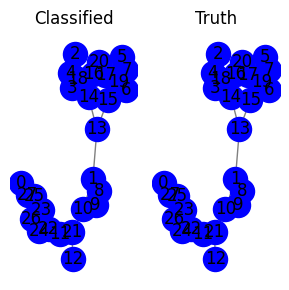

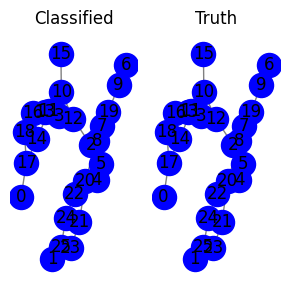

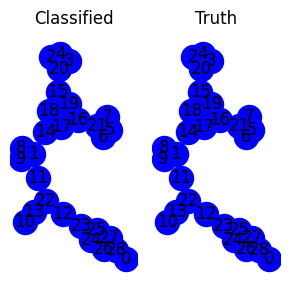

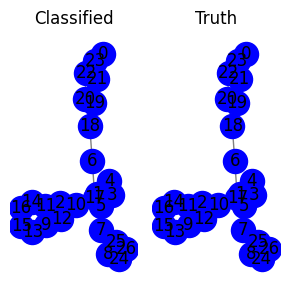

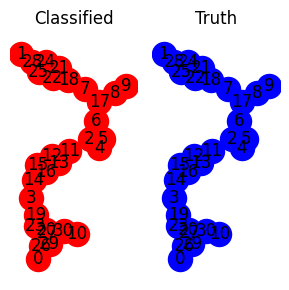

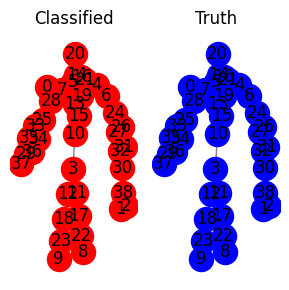

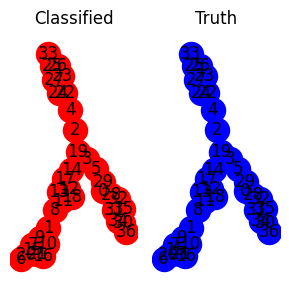

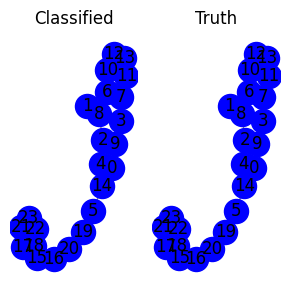

Feature importances based on weights: [0.257657   0.22988617 0.21635629 0.17277165 0.16555515 0.16178766
 0.5366532  0.15486133 0.29230386]


In [ ]:
# Write your solution here
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.datasets import TUDataset
from torch_geometric.data import DataLoader
import networkx as nx
import numpy as np
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Load NCI109 dataset
dataset = TUDataset(root='data/TUDataset', name='NCI109')
print(len(dataset))
# # Split the dataset
train_dataset = dataset[:int(0.8*len(dataset))]
test_dataset = dataset[int(0.8*len(dataset)):]
# Function to check if a subgraph is a linear chain
def is_chain(subgraph):
  nodes = len(subgraph.nodes())
  if nodes<3:
    return False
  degrees = [subgraph.degree(n) for n in subgraph.nodes()]
  return degrees.count(1)==2 and degrees.count(2) == nodes-2

# # Function to extract graphlet features
def extract_graphlet_features(graph):
    G = nx.Graph()
    G.add_edges_from(graph.edge_index.numpy().T)

    features = np.zeros(9)  # Initialize features for G1 to G9

    # G1: Triangle count
    features[0] = triangle = len([c for c in nx.cycle_basis(G) if len(c) == 3])

    # G2: Hexagon (C6) count
    features[1] = len([c for c in nx.cycle_basis(G) if len(c) == 6])

    # G3: Pentagon (C5) count
    features[2] = len([c for c in nx.cycle_basis(G) if len(c) == 5])

    # G4: K4 (complete subgraphs of size 4)
    features[3] = len([s for s in nx.enumerate_all_cliques(G) if len(s) == 4])

    # G5: K5 (complete subgraphs of size 5)
    features[4] = len([s for s in nx.enumerate_all_cliques(G) if len(s) == 5])

    # G6: 6-node clique
    features[5] = len([s for s in nx.enumerate_all_cliques(G) if len(s) == 6])

    # G7: 4-cycle (C4)
    features[6] = len([c for c in nx.cycle_basis(G) if len(c) == 4])

    # G8: Star (a center node with more than 2 connections)
    features[7] = len([n for n in G.nodes() if G.degree(n) > 2])

    # G9: Chains (linear sequences of 3 or more nodes)
    chains = [subgraph for subgraph in nx.connected_components(G) if is_chain(G.subgraph(subgraph))]
    features[8] = len(chains)

    return features

# Extract features for all graphs
def extract_all_features(dataset):
  features = []
  labels = []
  for graph in dataset:
    feature_vector = extract_graphlet_features(graph)
    np.concatenate((feature_vector, graph.x.mean(dim=0).numpy()))
    features.append(feature_vector)
    labels.append(graph.y.item())
  return features,labels

train_features, train_labels = extract_all_features(train_dataset)
test_features, test_labels = extract_all_features(test_dataset)
train_set = torch.utils.data.TensorDataset(torch.tensor(train_features, dtype=torch.float32), torch.tensor(train_labels, dtype=torch.float))
test_set = torch.utils.data.TensorDataset(torch.tensor(test_features, dtype=torch.float32), torch.tensor(test_labels, dtype=torch.float))
train_loader = DataLoader(train_set, batch_size = 64, shuffle=True)
test_loader = DataLoader(test_set, batch_size =len(test_features), shuffle=False)
# Print the original graphlet counts for each graph in the training set
for feature in train_features:
  print(feature)
# Standardize features
scaler = StandardScaler()
scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)
# Define the neural network
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
      super(FeedforwardNN, self).__init__()
      self.layer1 = nn.Linear(input_dim,hidden_dim)
      self.layer2 = nn.Linear(hidden_dim,hidden_dim)
      self.layer3 = nn.Linear(hidden_dim,output_dim)
    def forward(self, x):
      x = self.layer1(x)
      x = nn.functional.relu(x)
      x = self.layer2(x)
      x = nn.functional.relu(x)
      x = self.layer3(x)
      x = nn.functional.relu(x)
      return nn.functional.sigmoid(x)


# Train the model
model = FeedforwardNN(train_features.shape[1],64,1)
optimizer = optim.Adam(model.parameters(),lr = 0.001)
criterion = nn.BCELoss()
for epoch in range(200):
  model.train()
  for data in train_loader:
    optimizer.zero_grad()
    features,labels = data
    outputs = model(features)
    loss = criterion(outputs.squeeze(),labels)
    loss.backward()
    optimizer.step()


# Evaluate the model
model.eval()
with torch.no_grad():
  for data in test_loader:
    features,labels = data
    outputs = model(features).squeeze()
    outputs = (outputs > 0.5).float()
    print(f"Accuracy: {accuracy_score(outputs, labels)}")
    print(f"Precision: {precision_score(outputs, labels)}")
    print(f"F1: {f1_score(outputs, labels)}")
    print(f"Recall: {recall_score(outputs, labels)}")
# Visualize the classification results
    for graph, label, output in zip(test_dataset[:50], labels[:50], outputs[:50]):
      G = nx.Graph()
      G.add_edges_from(graph.edge_index.numpy().T)
      pos = nx.spring_layout(G)
      fig, axes = plt.subplots(1, 2, figsize=(3, 3))  # 1 row, 2 columns
      nx.draw(G, pos, ax=axes[0], with_labels=True, node_color=['red' if output == 1 else 'blue'], edge_color='gray')
      axes[0].set_title('Classified')
      nx.draw(G, pos, ax=axes[1], with_labels=True, node_color=['red' if label == 1 else 'blue'], edge_color='gray')
      axes[1].set_title('Truth')
      # Adjust layout
      plt.tight_layout()
      plt.show()
#Feature Importance
weights = model.layer1.weight.data.numpy()
importances = np.abs(weights).mean(axis=0)
print("Feature importances based on weights:", importances)

Processing...
Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/io/fs.py:215: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location)


Dataset size: 4127


<ipython-input-4-721e5a588c65>:116: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  train_set = torch.utils.data.TensorDataset(torch.tensor(train_features, dtype=torch.float32), torch.tensor(train_labels, dtype=torch.float))
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Accuracy: 0.6343825665859564
Precision: 0.6441441441441441
F1: 0.6544622425629291
Recall: 0.6651162790697674


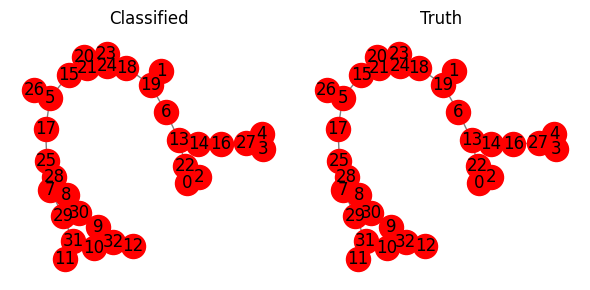

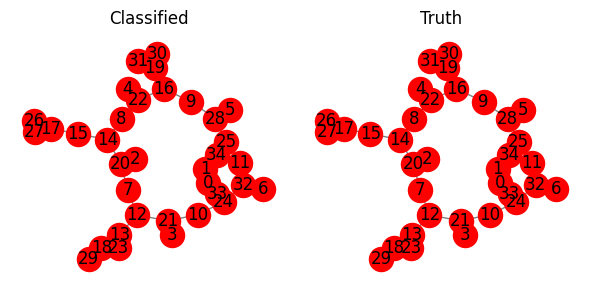

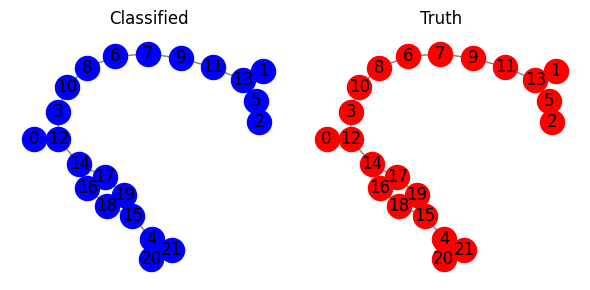

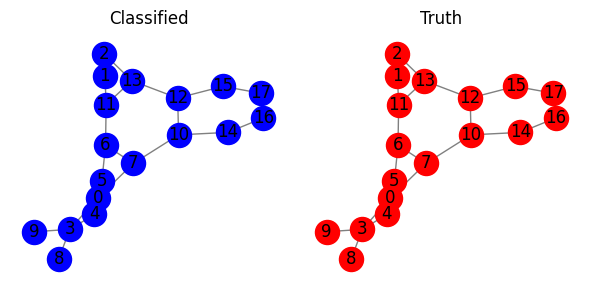

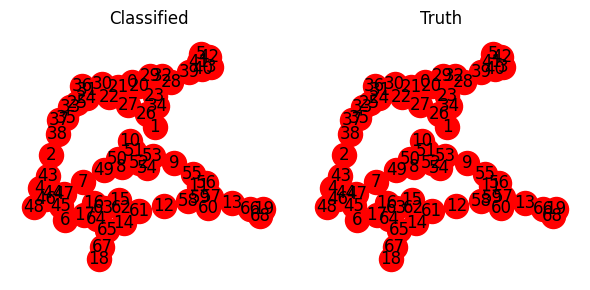

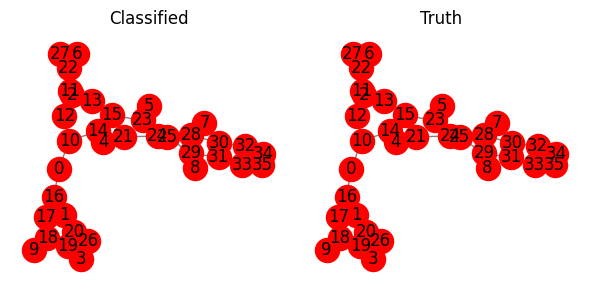

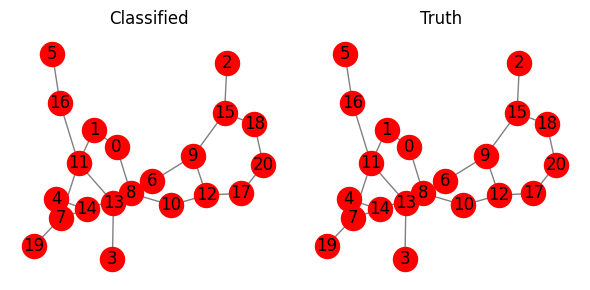

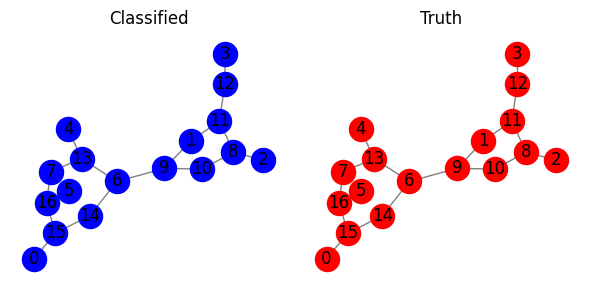

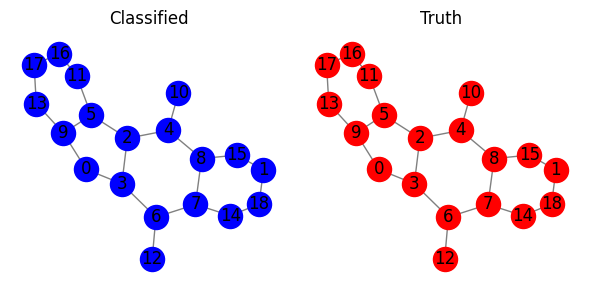

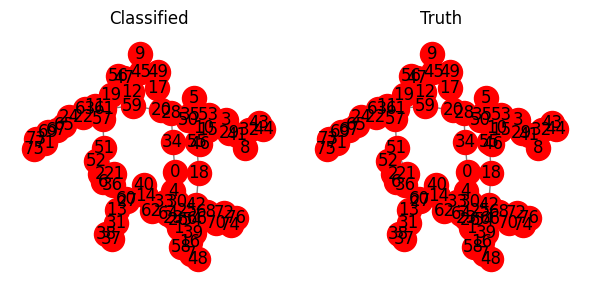

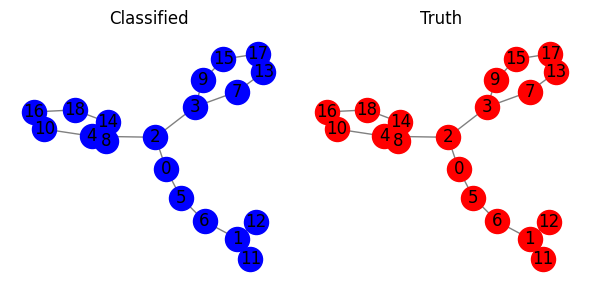

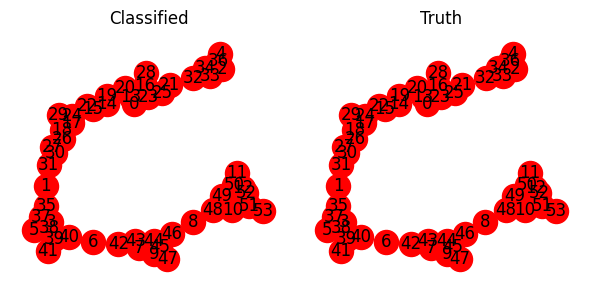

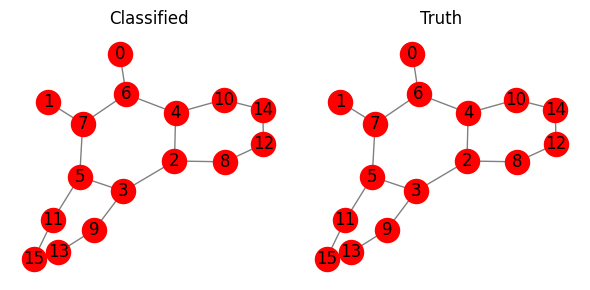

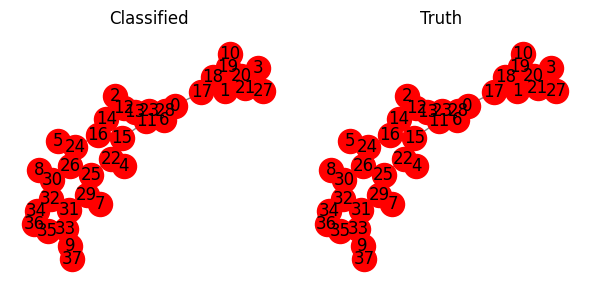

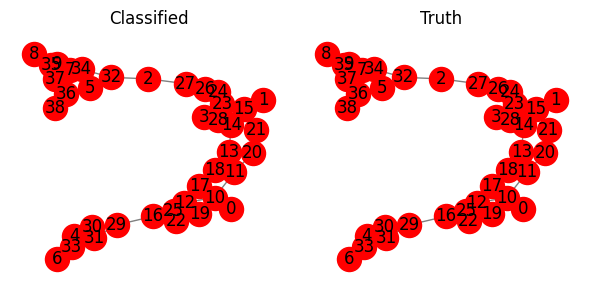

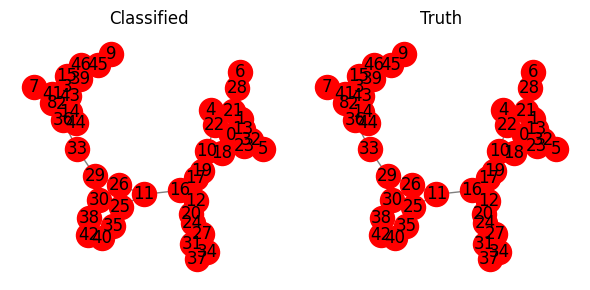

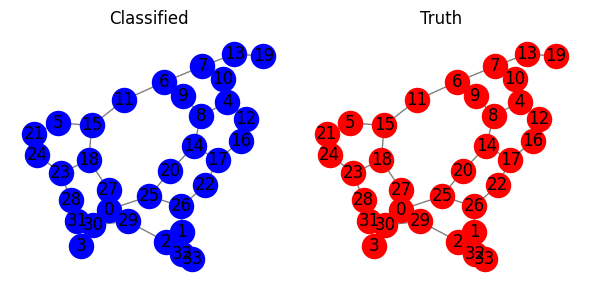

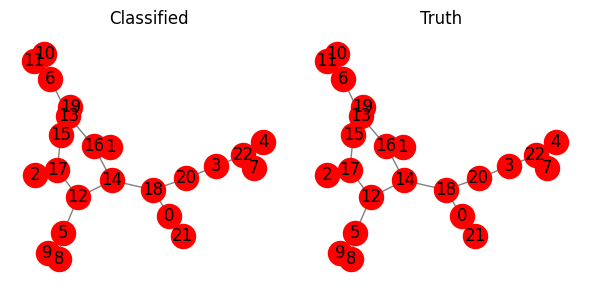

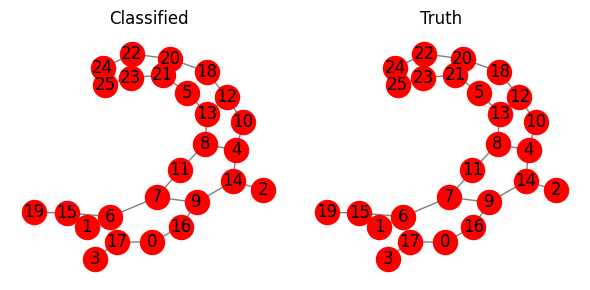

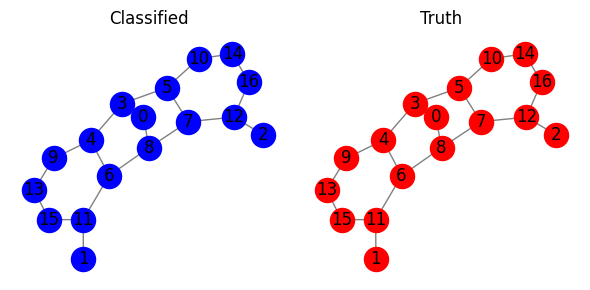

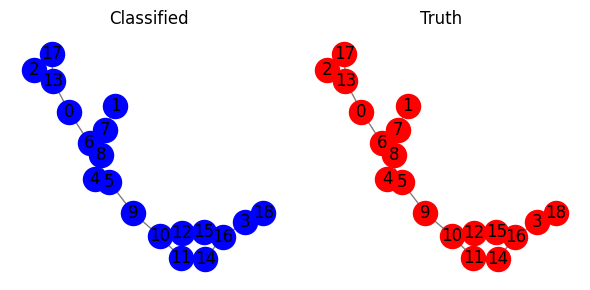

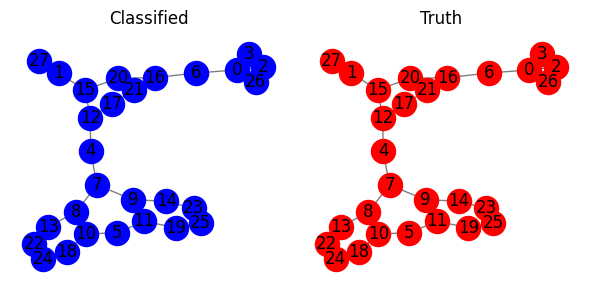

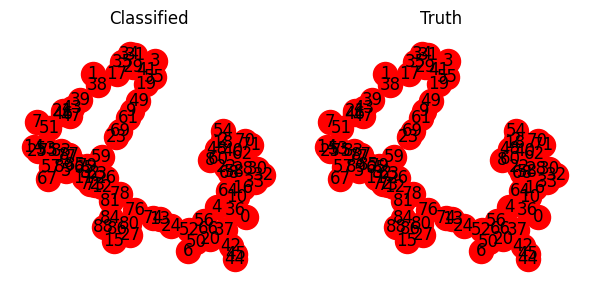

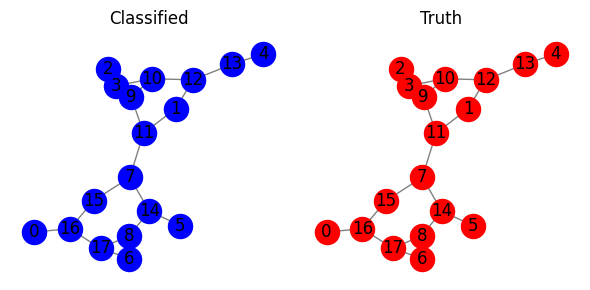

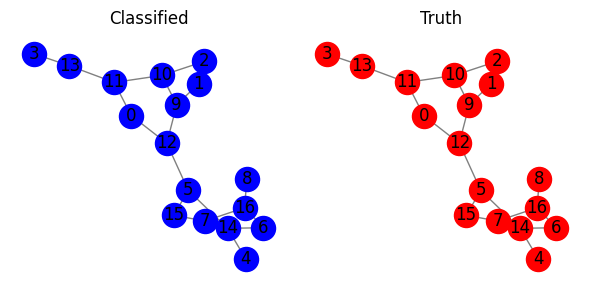

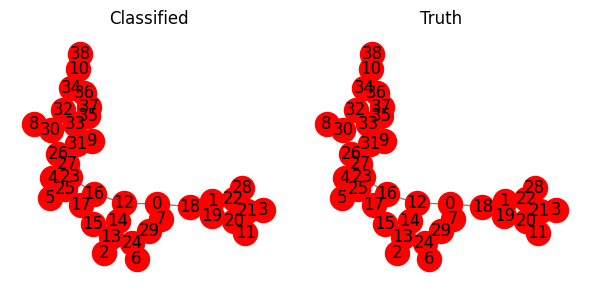

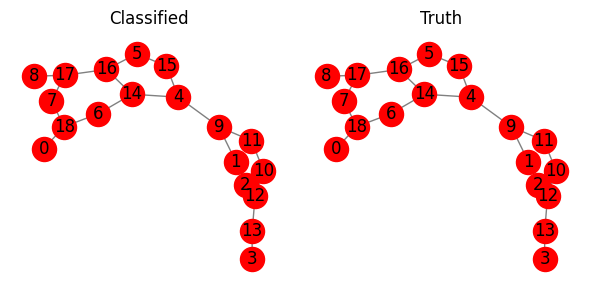

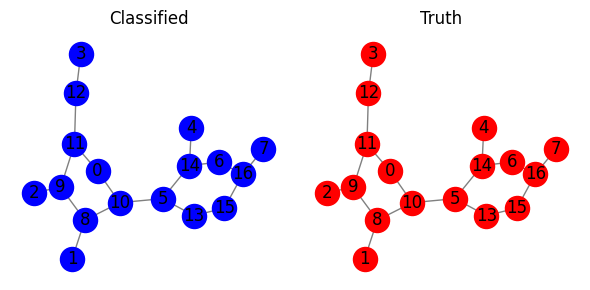

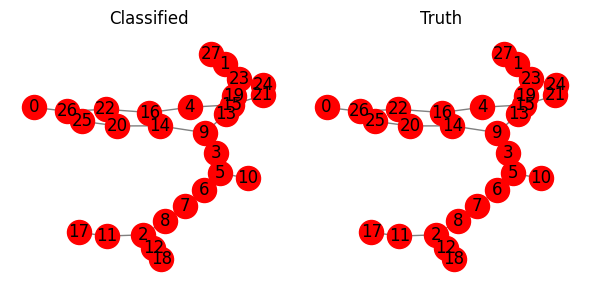

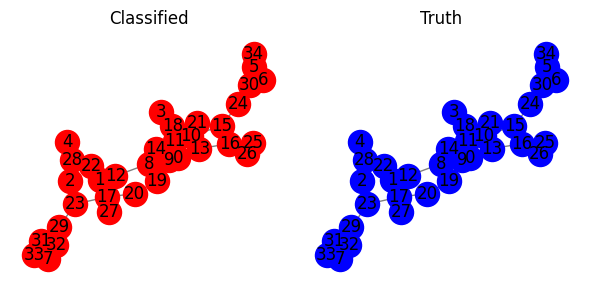

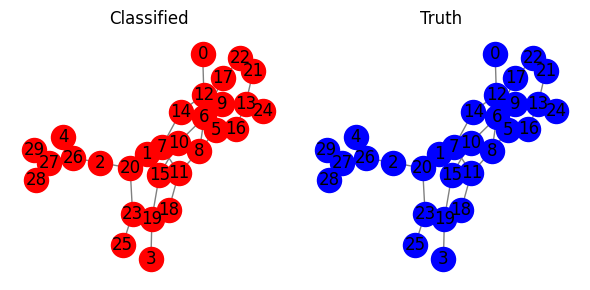

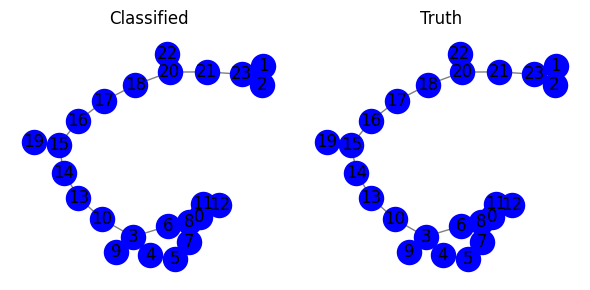

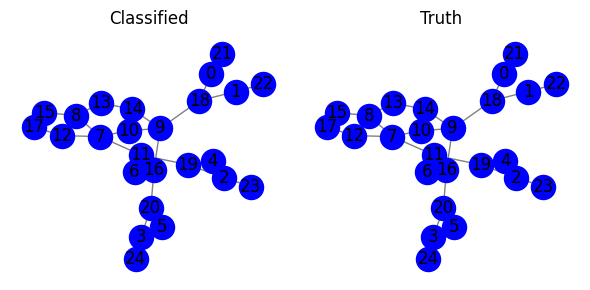

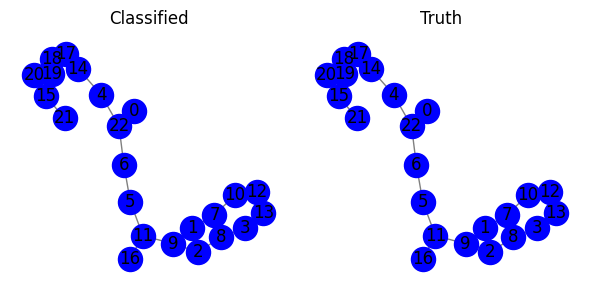

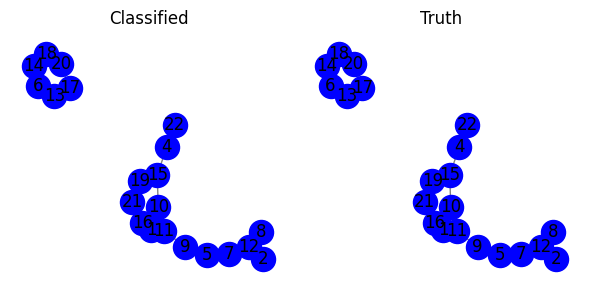

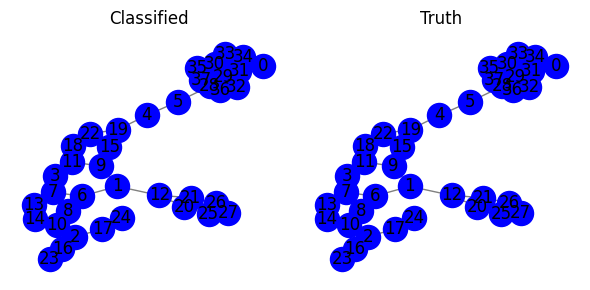

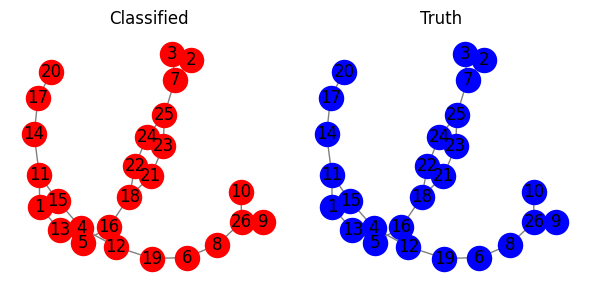

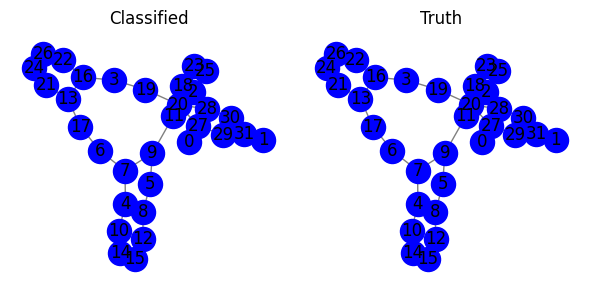

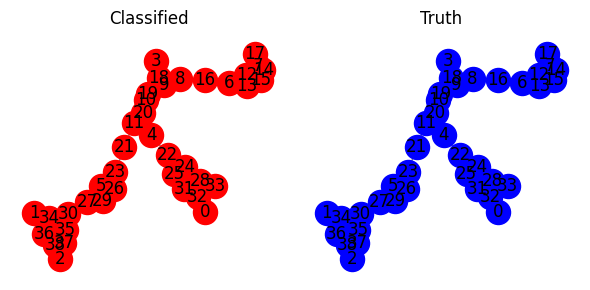

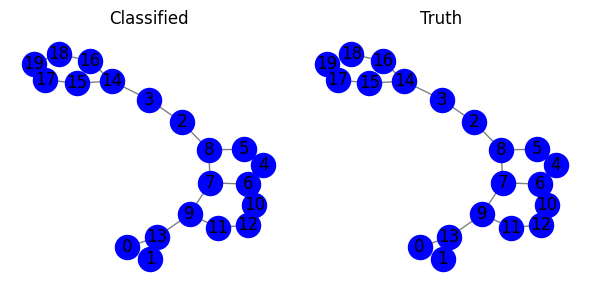

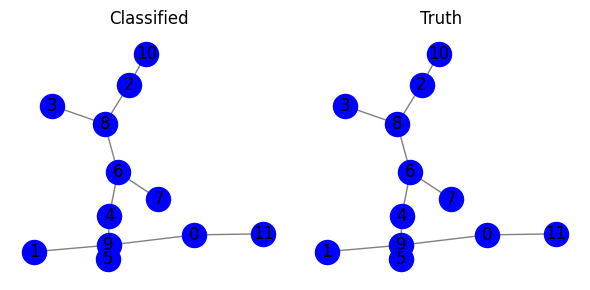

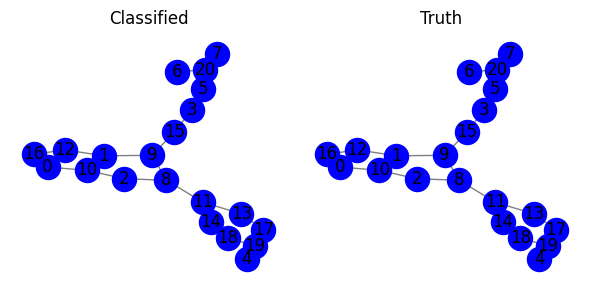

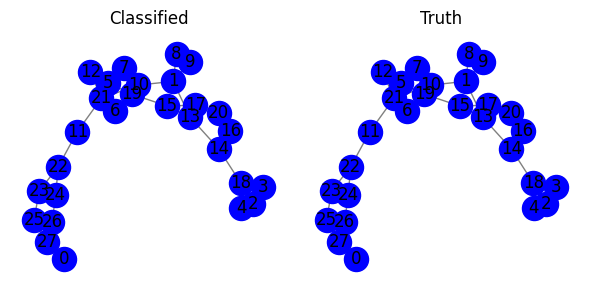

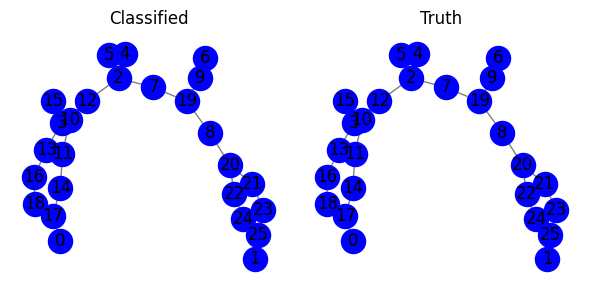

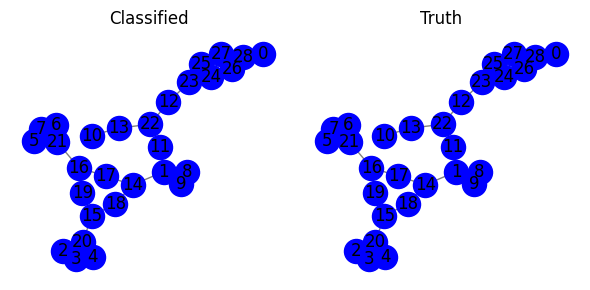

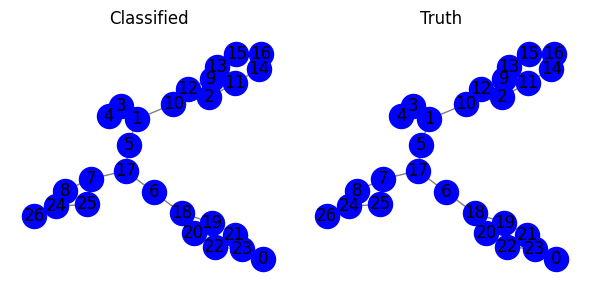

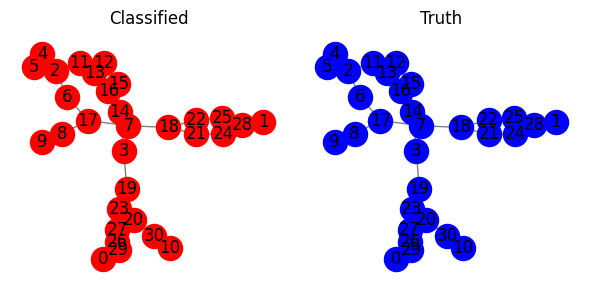

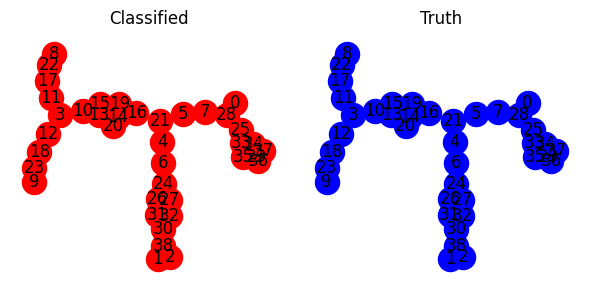

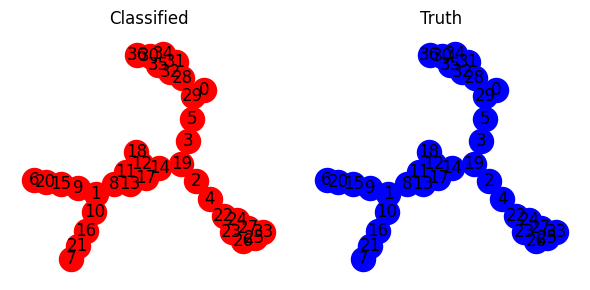

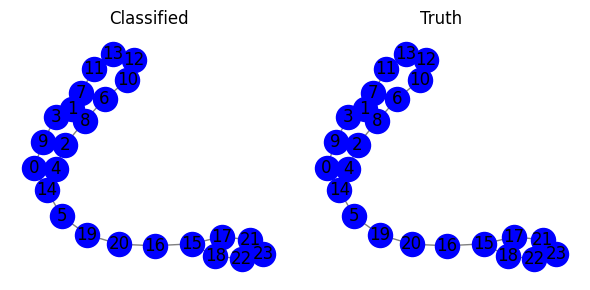

Feature importances based on weights: [0.15506592 0.13207467 0.16439669 0.05607045 0.05564953 0.05683828
 0.2371129  0.07255769 0.17534924 0.80102444 1.0209504  0.31980366
 0.40642768 1.0135555  0.51369846 0.70436543 0.6765744  0.54100096
 0.511813   0.29765016 0.73716    0.6140509  0.6926074  0.32656154
 0.5604696  0.355913   0.74411154 0.6446624  0.57651573 0.7440521
 0.5601314  0.3676809  1.0299143  0.79180866 0.26784706 0.3245213
 0.5497053  0.46125302 0.29492167 0.80489457 0.57907534 0.2795583
 0.35718596 0.6491668  0.63007456 0.82197523 0.30930895 0.30397683
 0.8489107  0.36323804 0.3635678  0.81233627 0.21641307 1.0698004
 0.2995266  0.50258    0.39188132 0.84635866 0.51160043 0.63811815
 0.5934528  0.537157   0.42697933 0.17944    0.34794694 0.39955345
 0.29898518 1.0296375  0.6191924  0.7913487  0.37670612 0.57233995
 0.5179028 ]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.datasets import TUDataset
from torch_geometric.data import DataLoader
import networkx as nx
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# Load NCI109 dataset
dataset = TUDataset(root='data/TUDataset', name='NCI109')
print(f"Dataset size: {len(dataset)}")

# Split the dataset
train_dataset = dataset[:int(0.8*len(dataset))]
test_dataset = dataset[int(0.8*len(dataset)):]

# Function to check if a subgraph is a linear chain
def is_chain(subgraph):
    nodes = len(subgraph.nodes())
    if nodes < 3:
        return False
    degrees = [subgraph.degree(n) for n in subgraph.nodes()]
    return degrees.count(1) == 2 and degrees.count(2) == nodes - 2

# Function to extract graphlet features
def extract_graphlet_features(graph):
    G = nx.Graph()
    G.add_edges_from(graph.edge_index.numpy().T)

    features = np.zeros(9)  # Initialize features for G1 to G9

    # G1: Triangle count
    features[0] = triangle = len([c for c in nx.cycle_basis(G) if len(c) == 3])

    # G2: Hexagon (C6) count
    features[1] = len([c for c in nx.cycle_basis(G) if len(c) == 6])

    # G3: Pentagon (C5) count
    features[2] = len([c for c in nx.cycle_basis(G) if len(c) == 5])

    # G4: K4 (complete subgraphs of size 4)
    features[3] = len([s for s in nx.enumerate_all_cliques(G) if len(s) == 4])

    # G5: K5 (complete subgraphs of size 5)
    features[4] = len([s for s in nx.enumerate_all_cliques(G) if len(s) == 5])

    # G6: 6-node clique
    features[5] = len([s for s in nx.enumerate_all_cliques(G) if len(s) == 6])

    # G7: 4-cycle (C4)
    features[6] = len([c for c in nx.cycle_basis(G) if len(c) == 4])

    # G8: Star (a center node with more than 2 connections)
    features[7] = len([n for n in G.nodes() if G.degree(n) > 2])

    # G9: Chains (linear sequences of 3 or more nodes)
    chains = [subgraph for subgraph in nx.connected_components(G) if is_chain(G.subgraph(subgraph))]
    features[8] = len(chains)

    return features

# Function to perform random walks on a graph
def perform_random_walks(graph, num_walks=10, walk_length=5):
    walks = []
    nodes = list(graph.nodes())
    for _ in range(num_walks):
        random.shuffle(nodes)
        for node in nodes:
            walk = [node]
            while len(walk) < walk_length:
                neighbors = list(graph.neighbors(walk[-1]))
                if neighbors:
                    walk.append(random.choice(neighbors))
                else:
                    break
            walks.append([str(node) for node in walk])  # Convert to string for gensim compatibility
    return walks

# Function to extract node embeddings using Skip-Gram (DeepWalk)
def extract_node_embeddings(graph, embedding_size=64, num_walks=10, walk_length=5):
    walks = perform_random_walks(graph, num_walks, walk_length)
    # Train Skip-Gram model using Word2Vec
    model = Word2Vec(sentences=walks, vector_size=embedding_size, window=5, min_count=0, sg=1, workers=2)
    embeddings = {str(node): model.wv[str(node)] for node in graph.nodes()}
    return embeddings

# Extract features for all graphs
def extract_all_features(dataset):
    features = []
    labels = []
    for graph in dataset:
        feature_vector = extract_graphlet_features(graph)

        # Get node embeddings from Skip-Gram
        G = nx.Graph()
        G.add_edges_from(graph.edge_index.numpy().T)
        node_embeddings = extract_node_embeddings(G)

        # Aggregate node embeddings (e.g., mean embedding)
        mean_embedding = np.mean(list(node_embeddings.values()), axis=0)

        # Combine graphlet features with node embeddings
        combined_features = np.concatenate((feature_vector, mean_embedding))

        features.append(combined_features)
        labels.append(graph.y.item())
    return features, labels

train_features, train_labels = extract_all_features(train_dataset)
test_features, test_labels = extract_all_features(test_dataset)
train_set = torch.utils.data.TensorDataset(torch.tensor(train_features, dtype=torch.float32), torch.tensor(train_labels, dtype=torch.float))
test_set = torch.utils.data.TensorDataset(torch.tensor(test_features, dtype=torch.float32), torch.tensor(test_labels, dtype=torch.float))
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=len(test_features), shuffle=False)

# Standardize features
scaler = StandardScaler()
scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

# Define the neural network
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.functional.relu(x)
        x = self.layer2(x)
        x = nn.functional.relu(x)
        x = self.layer3(x)
        x = nn.functional.sigmoid(x)
        return x

# Train the model
model = FeedforwardNN(train_features.shape[1], 64, 1)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

for epoch in range(200):
    model.train()
    for data in train_loader:
        optimizer.zero_grad()
        features, labels = data
        outputs = model(features)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    for data in test_loader:
        features, labels = data
        outputs = model(features).squeeze()
        outputs = (outputs > 0.5).float()
        print(f"Accuracy: {accuracy_score(outputs, labels)}")
        print(f"Precision: {precision_score(outputs, labels)}")
        print(f"F1: {f1_score(outputs, labels)}")
        print(f"Recall: {recall_score(outputs, labels)}")

# Visualize the classification results
for graph, label, output in zip(test_dataset[:50], labels[:50], outputs[:50]):
    G = nx.Graph()
    G.add_edges_from(graph.edge_index.numpy().T)
    pos = nx.spring_layout(G)
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns
    nx.draw(G, pos, ax=axes[0], with_labels=True, node_color=['red' if output == 1 else 'blue'], edge_color='gray')
    axes[0].set_title('Classified')
    nx.draw(G, pos, ax=axes[1], with_labels=True, node_color=['red' if label == 1 else 'blue'], edge_color='gray')
    axes[1].set_title('Truth')
    plt.tight_layout()
    plt.show()

# Feature Importance
weights = model.layer1.weight.data.numpy()
importances = np.abs(weights).mean(axis=0)
print("Feature importances based on weights:", importances)


/usr/local/lib/python3.10/dist-packages/torch_geometric/data/dataset.py:238: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  if osp.exists(f) and torch.load(f) != _repr(self.p

Dataset size: 4127
Accuracy: 0.6319612590799032
Precision: 0.6832460732984293
Recall: 0.5878378378378378
F1 Score: 0.6319612590799031


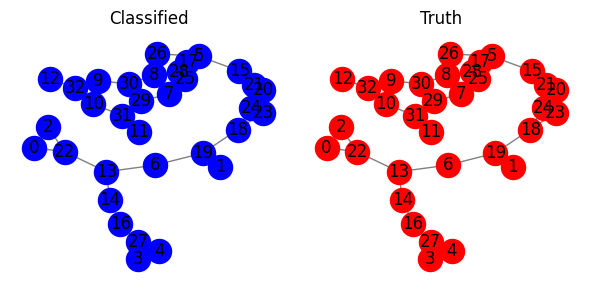

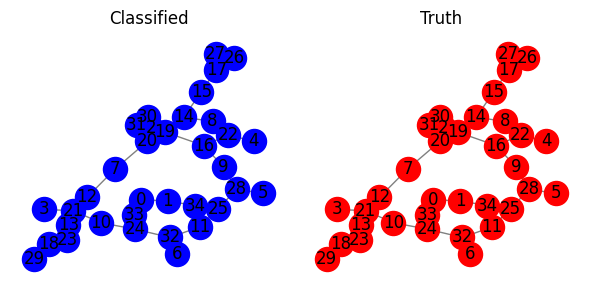

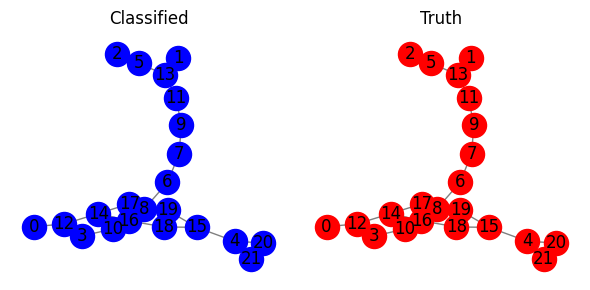

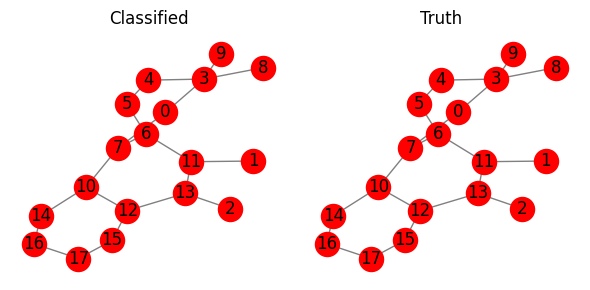

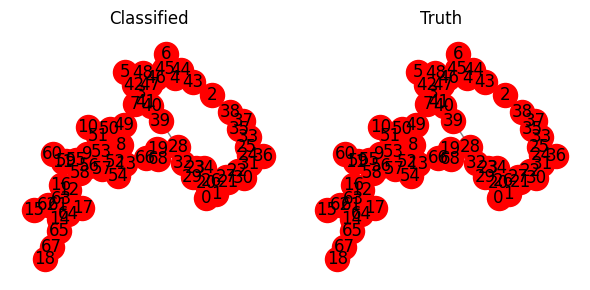

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.utils import to_networkx
import networkx as nx
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load NCI109 dataset
dataset = TUDataset(root='data/TUDataset', name='NCI109')
print(f"Dataset size: {len(dataset)}")

# Split the dataset
train_dataset = dataset[:int(0.8 * len(dataset))]
test_dataset = dataset[int(0.8 * len(dataset)):]

# Define the GCN model
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, edge_index, batch):
        # First GCN layer
        x = self.conv1(x, edge_index)
        x = nn.functional.relu(x)

        # Second GCN layer
        x = self.conv2(x, edge_index)
        x = nn.functional.relu(x)

        # Global mean pooling
        x = global_mean_pool(x, batch)

        # Final linear layer
        x = self.fc(x)
        x = torch.sigmoid(x).squeeze(1)  # Assuming binary classification
        return x

# Define the data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

# Initialize the model, loss function, and optimizer
model = GCN(input_dim=dataset.num_node_features, hidden_dim=64, output_dim=1)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Training loop
for epoch in range(200):
    model.train()
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = criterion(out, data.y.float())
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for data in test_loader:
        out = model(data.x, data.edge_index, data.batch)
        preds = (out > 0.5).float()
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(data.y.cpu().numpy())

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Visualize a few graphs with their predicted and true labels
for graph, label, pred in zip(test_dataset[:5], all_labels[:5], all_preds[:5]):
    G = to_networkx(graph, to_undirected=True)
    pos = nx.spring_layout(G)
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns
    nx.draw(G, pos, ax=axes[0], with_labels=True, node_color=['red' if pred == 1 else 'blue'], edge_color='gray')
    axes[0].set_title('Classified')
    nx.draw(G, pos, ax=axes[1], with_labels=True, node_color=['red' if label == 1 else 'blue'], edge_color='gray')
    axes[1].set_title('Truth')
    plt.tight_layout()
    plt.show()
